<a href="https://colab.research.google.com/github/ZRose100/Senior-Project/blob/main/Initial_and_Geographic_Analysis_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SET UP

In [ ]:
# Installations:
!pip install calplot
!pip install july

# Imported Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import warnings
import logging
import calplot
import july
import matplotlib.patheffects as path_effects
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import datetime
import matplotlib.colors as colors


# Wrap Labels Set-Up:
def wrap_labels(ax, width, break_long_words=False):
      labels = []
      for label in ax.get_xticklabels():
          text = label.get_text()
          labels.append(textwrap.fill(text, width=width,
                        break_long_words=break_long_words))
      ax.set_xticklabels(labels, rotation=0, ha="center")

# Get Dates from Months:
def get_month_dates(year, month):
    """
    Returns the start and end dates of a given month.

    Args:
        year (int): The year.
        month (int): The month.

    Returns:
        tuple: A tuple containing the start date and end date as datetime.date objects.
    """
    # Get the first day of the month
    start_date = datetime.date(year, month, 1)

    # Get the last day of the month
    if month == 12:
        # If it's December, the next month is January of the next year
        end_date = datetime.date(year + 1, 1, 1) - datetime.timedelta(days=1)
    else:
        # Otherwise, the next month is simply month + 1
        end_date = datetime.date(year, month + 1, 1) - datetime.timedelta(days=1)

    return start_date, end_date

In [ ]:
# Import contact requests
requests = pd.read_excel('/content/Contact Requests (Oct-Mar).xlsx')

# Rename column headers
requests = requests.rename(columns={'AREA WITH WHICH YOU NEED ASSISTANCE': 'ASSISTANCE TYPE',
                                    'Discovery Method': 'DISCOVERY METHOD'})

# Remove column
requests = requests.drop('HOW DID YOU HEAR ABOUT THE SENIOR SOURCE?', axis=1)

# Create TIME column from ENTRY DATE
requests['TIME'] = requests['ENTRY DATE'].dt.time

# Create DAY OF WEEK column from ENTRY DATE
requests.insert(10, 'DAY OF WEEK', requests['ENTRY DATE'].dt.day_name())

requests.head()
requests.tail()

,NAME,PHONE,ZIP CODE,ASSISTANCE TYPE,AGE RANGE,COMMENTS,DISCOVERY METHOD,ENTRY DATE,MONTH,DAY,DAY OF WEEK,YEAR,TIME
449,Person450,Phone450,75013,Caregiver Support,70-80,"Hi, my name is [NAME], I am inquiring on beha...",Social Media,2025-03-30 20:53:22,March,30,Sunday,2025,20:53:22
450,Person451,Phone451,75240,Employment Services,65-70,I need to make money inorder to pay my rent.,Drive by facility/signs,2025-03-31 11:52:57,March,31,Monday,2025,11:52:57
451,Person452,Phone452,75232,In-Home Companions,70-80,I need to speak with someone about several of ...,Referred,2025-03-31 14:28:08,March,31,Monday,2025,14:28:08
452,Person453,Phone453,75225,Employment Services,70-80,I need help finding a job. I need to supplemen...,Drive by facility/signs,2025-03-31 15:05:29,March,31,Monday,2025,15:05:29
453,Person454,Phone454,75246,Employment Services,55-65,I have been a waitress for the last 9 years. ...,Google/Internet Search,2025-03-31 19:32:23,March,31,Monday,2025,19:32:23


In [ ]:
print('Request Columns: \n', requests.columns,'\n')
print('Request Description: \n', requests.describe(),'\n')
print('Request Information: \n', requests.info())

print(requests['DISCOVERY METHOD'].unique())

Request Columns: 
 Index(['NAME', 'PHONE', 'ZIP CODE', 'ASSISTANCE TYPE', 'AGE RANGE', 'COMMENTS',
       'DISCOVERY METHOD', 'ENTRY DATE', 'MONTH', 'DAY', 'DAY OF WEEK', 'YEAR',
       'TIME'],
      dtype='object') 

Request Description: 
                           ENTRY DATE         DAY         YEAR
count                            454  454.000000   454.000000
mean   2025-01-12 08:33:43.729074688   15.370044  2024.638767
min              2024-10-01 21:59:34    1.000000  2024.000000
25%    2024-12-02 10:55:11.249999872    8.000000  2024.000000
50%       2025-01-22 02:08:29.500000   15.000000  2025.000000
75%    2025-02-23 08:44:02.249999872   23.000000  2025.000000
max              2025-03-31 19:32:23   31.000000  2025.000000
std                              NaN    8.587664     0.480888 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  

# **UNIVARIATE ANALYSIS**

## **AGE RANGE** Count Distribution

<ipython-input-7-df12b5cbd1de>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  age_range_plot = sns.countplot(requests.sort_values(by='AGE RANGE', ascending=True), x="AGE RANGE", palette='crest')
<ipython-input-7-df12b5cbd1de>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_range_plot.set_xticklabels([


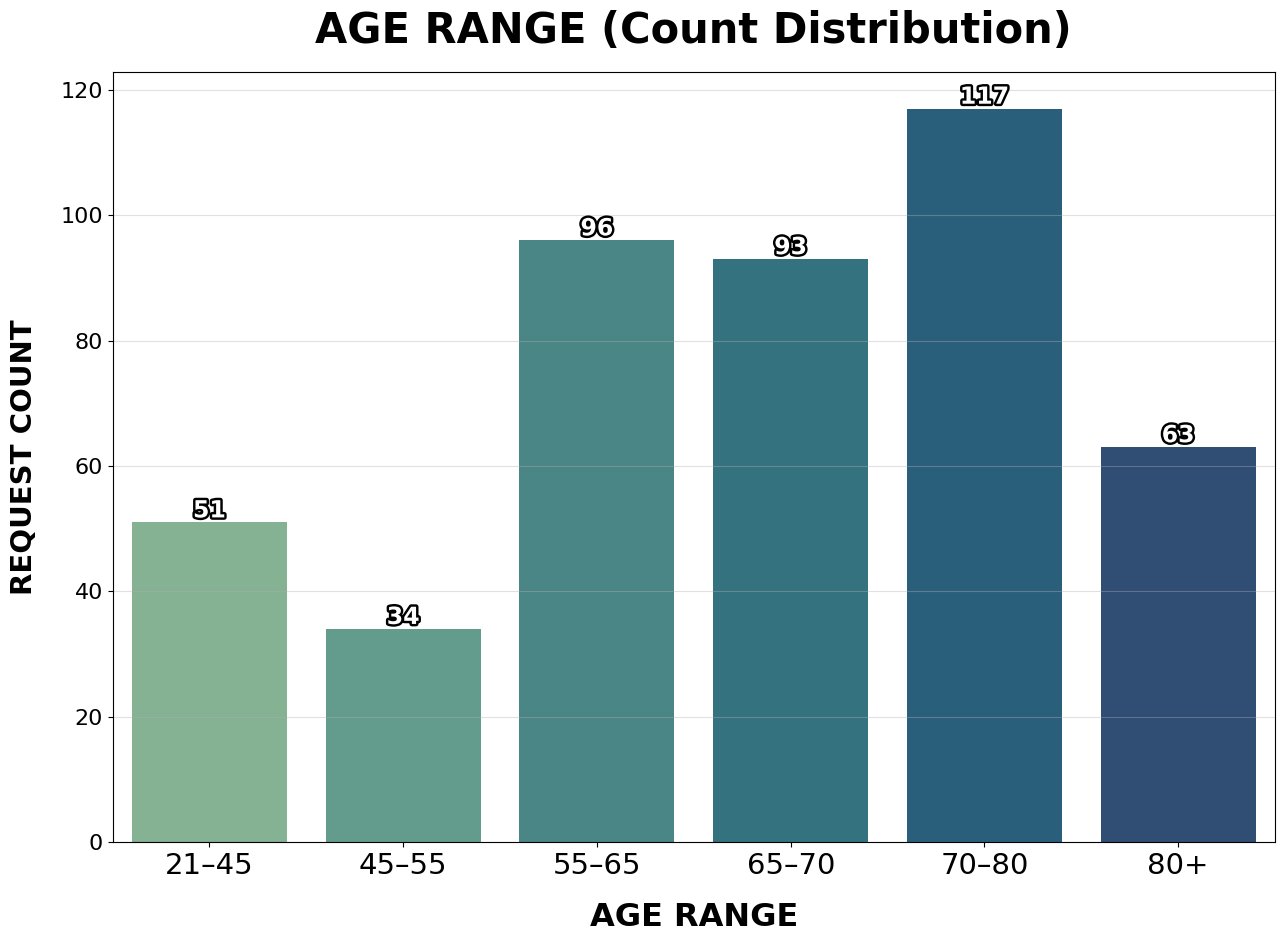

In [ ]:
# ==================================
#    AGE RANGE Count Distribution
# ==================================

# Set figure size before creating the plot
plt.figure(figsize=(15, 10))

# Establishes count plot
age_range_plot = sns.countplot(requests.sort_values(by='AGE RANGE', ascending=True), x="AGE RANGE", palette='crest')

# Customize the plot
age_range_plot.set_title("AGE RANGE (Count Distribution)", fontsize=30, fontweight='bold', pad=21)
age_range_plot.set_xlabel("AGE RANGE", fontsize=23, fontweight='bold', labelpad=16)
age_range_plot.set_ylabel("REQUEST COUNT", fontsize=21, fontweight='bold', labelpad=16)

plt.xticks(fontsize=21)

age_range_plot.set_xticklabels([
    label.get_text().replace('-', '–') for label in age_range_plot.get_xticklabels()
])
plt.yticks(fontsize=16)

# Only show horizontal gridlines
age_range_plot.grid(axis='y', alpha=0.39)

# Iterate through containers and add bar labels directly

#for container in age_range_plot.containers:
#    age_range_plot.bar_label(container)

for container in age_range_plot.containers:
    labels = [f'{int(bar.get_height())}' if bar.get_height() > 0 else '' for bar in container]
    age_range_plot.bar_label(
        container,
        labels=labels,
        label_type='edge',
        color='white',
        fontsize=17,
        fontweight='bold',
        path_effects=[
            path_effects.Stroke(linewidth=3.5, foreground='black'),
            path_effects.Normal()
        ]
    )

# Show the plot
plt.show()

## **ASSISTANCE TYPE** Count Distribution

<ipython-input-8-eb71b75c0db9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  assist_type_plot = sns.countplot(requests.sort_values(by='ASSISTANCE TYPE', ascending=True), x="ASSISTANCE TYPE", ax=ax, palette='mako')
<ipython-input-4-202c75df1ce7>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0, ha="center")


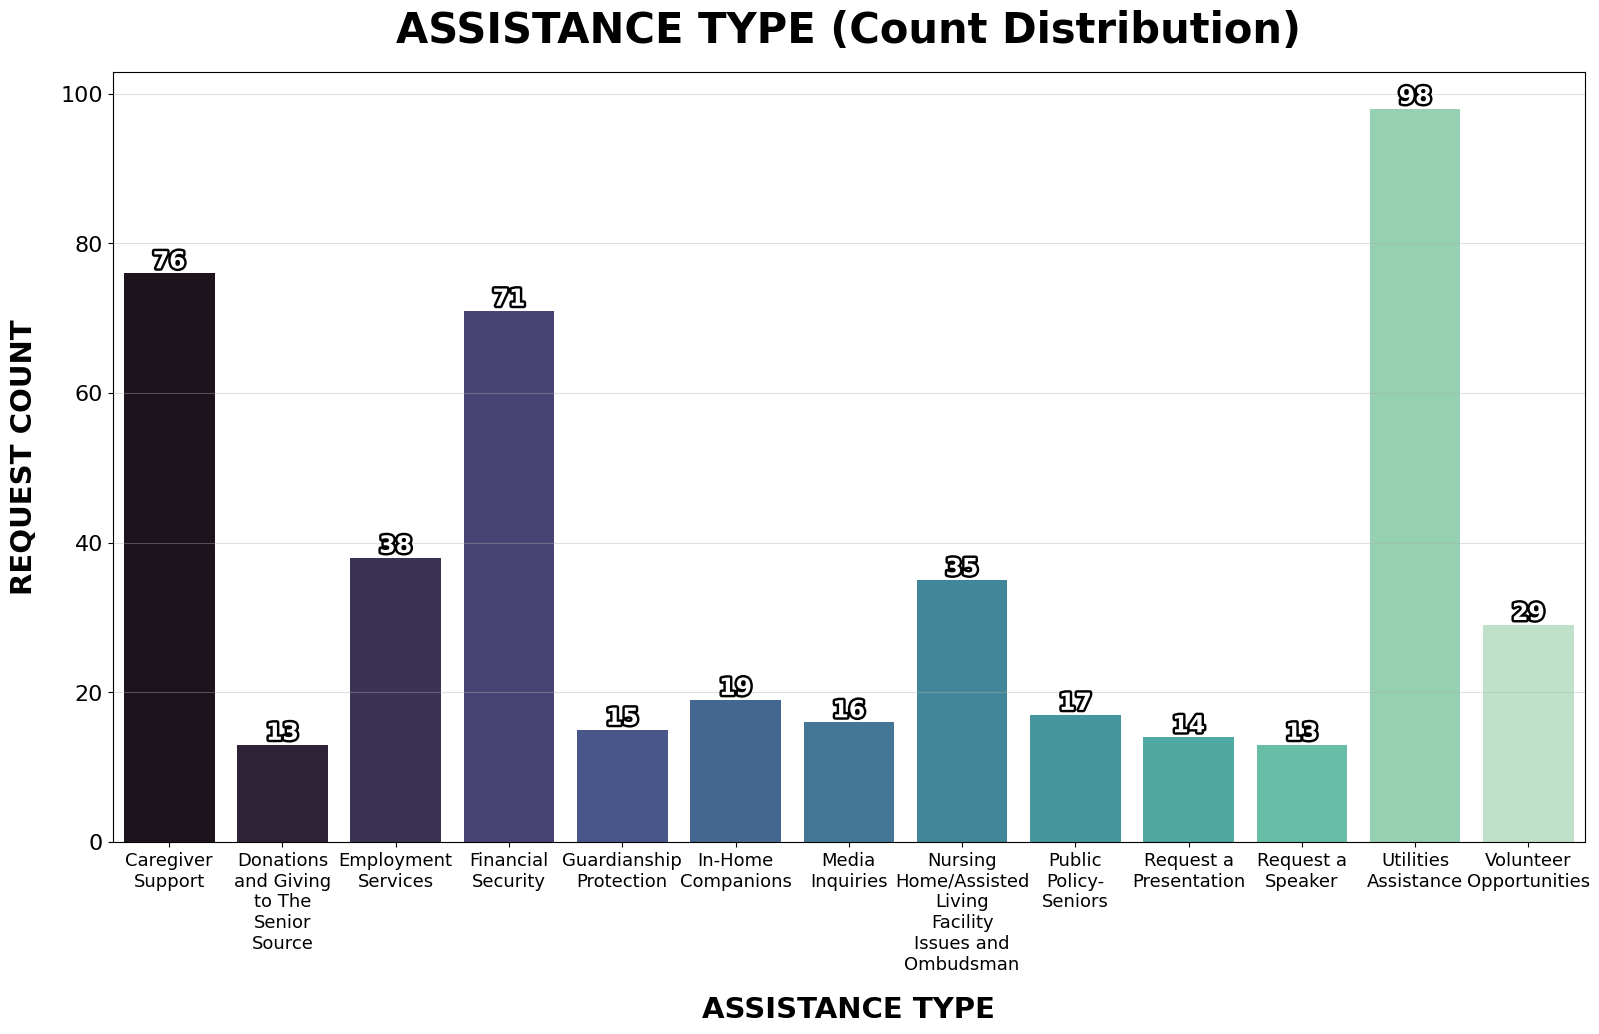

In [ ]:
# ========================================
#    ASSISTANCE TYPE Count Distribution
# ========================================

# Create the bar plot
fig, ax = plt.subplots(figsize=(19, 10)) # Create a figure and an axes object

# Establishes count plot
assist_type_plot = sns.countplot(requests.sort_values(by='ASSISTANCE TYPE', ascending=True), x="ASSISTANCE TYPE", ax=ax, palette='mako')

# Customize the plot
ax.set_title("ASSISTANCE TYPE (Count Distribution)", fontsize=30, fontweight='bold', pad=21) # Use ax to set the title
ax.set_xlabel('ASSISTANCE TYPE', fontsize=21, fontweight='bold', labelpad=16) # Use ax to set the x-axis label
ax.set_ylabel('REQUEST COUNT', fontsize=21, fontweight='bold', labelpad=16) # Use ax to set the y-axis label
#ax.grid(True)
ax.grid(axis='y', alpha=0.39)
plt.xticks(rotation=85, fontsize=13)  # Rotate x-axis labels for better readability
wrap_labels(ax, 11) # Pass the axes object to wrap_labels
plt.yticks(fontsize=16)

# Iterate through containers and add bar labels directly
#for container in assist_type_plot.containers:
#    assist_type_plot.bar_label(container)

for container in assist_type_plot.containers:
    labels = [f'{int(bar.get_height())}' if bar.get_height() > 0 else '' for bar in container]
    assist_type_plot.bar_label(
        container,
        labels=labels,
        label_type='edge',
        color='white',
        fontsize=17,
        fontweight='bold',
        path_effects=[
            path_effects.Stroke(linewidth=3.5, foreground='black'),
            path_effects.Normal()
        ]
    )

# Show the plot
plt.show()

## **DISCOVERY METHOD** Count Distribution

<ipython-input-9-ee3a560cdf1f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  discover_method_plot = sns.countplot(requests.sort_values(by='DISCOVERY METHOD', ascending=True), x="DISCOVERY METHOD", ax=ax, palette='mako')
<ipython-input-4-202c75df1ce7>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0, ha="center")


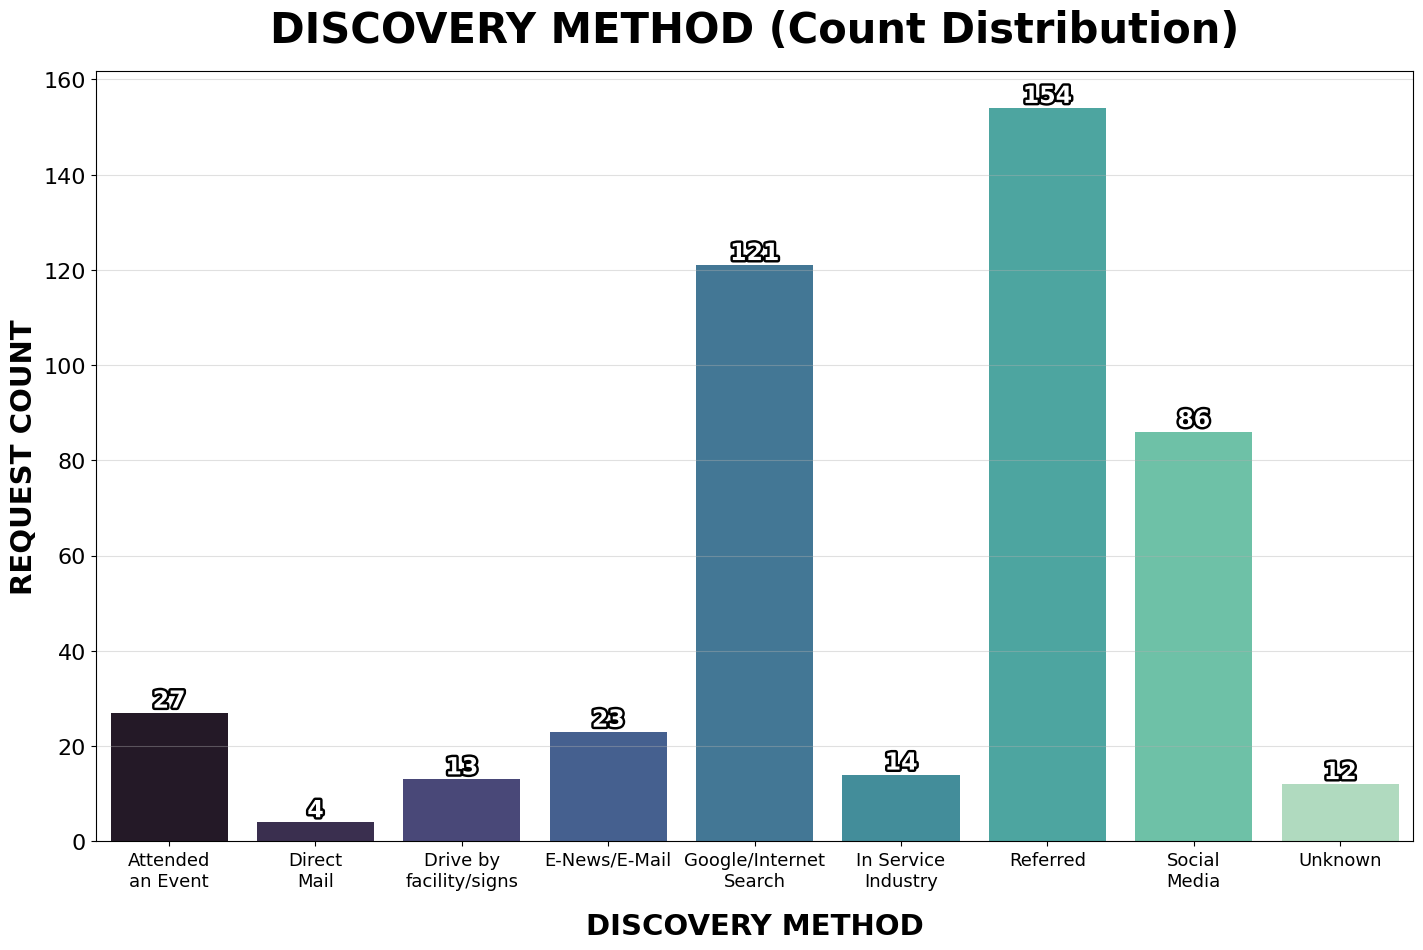

In [ ]:
# =========================================
#    DISCOVERY METHOD Count Distribution
# =========================================

# Create the bar plot
fig, ax = plt.subplots(figsize=(17, 10)) # Create a figure and an axes object

# Establishes count plot
discover_method_plot = sns.countplot(requests.sort_values(by='DISCOVERY METHOD', ascending=True), x="DISCOVERY METHOD", ax=ax, palette='mako')

# Customize the plot
ax.set_title("DISCOVERY METHOD (Count Distribution)", fontsize=30, fontweight='bold', pad=21) # Use ax to set the title
ax.set_xlabel('DISCOVERY METHOD', fontsize=21, fontweight='bold', labelpad=16) # Use ax to set the x-axis label
ax.set_ylabel('REQUEST COUNT', fontsize=21, fontweight='bold') # Use ax to set the y-axis label
#ax.grid(True)
ax.grid(axis='y', alpha=0.39)
plt.xticks(rotation=85, fontsize=13)  # Rotate x-axis labels for better readability
wrap_labels(ax, 10) # Pass the axes object to wrap_labels
plt.yticks(fontsize=16)

# Iterate through containers and add bar labels directly

#for container in discover_method_plot.containers:
#    discover_method_plot.bar_label(container)

for container in discover_method_plot.containers:
    labels = [f'{int(bar.get_height())}' if bar.get_height() > 0 else '' for bar in container]
    discover_method_plot.bar_label(
        container,
        labels=labels,
        label_type='edge',
        color='white',
        fontsize=17,
        fontweight='bold',
        path_effects=[
            path_effects.Stroke(linewidth=3.5, foreground='black'),
            path_effects.Normal()
        ]
    )


# Show the plot
plt.show()

## **MONTH** Count Distribution

<ipython-input-10-49e515a639ac>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  month_plot = sns.countplot(month_year.sort_values(by='ENTRY DATE', ascending=True), x="MONTH & YEAR", ax=ax, palette='mako')
<ipython-input-4-202c75df1ce7>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0, ha="center")


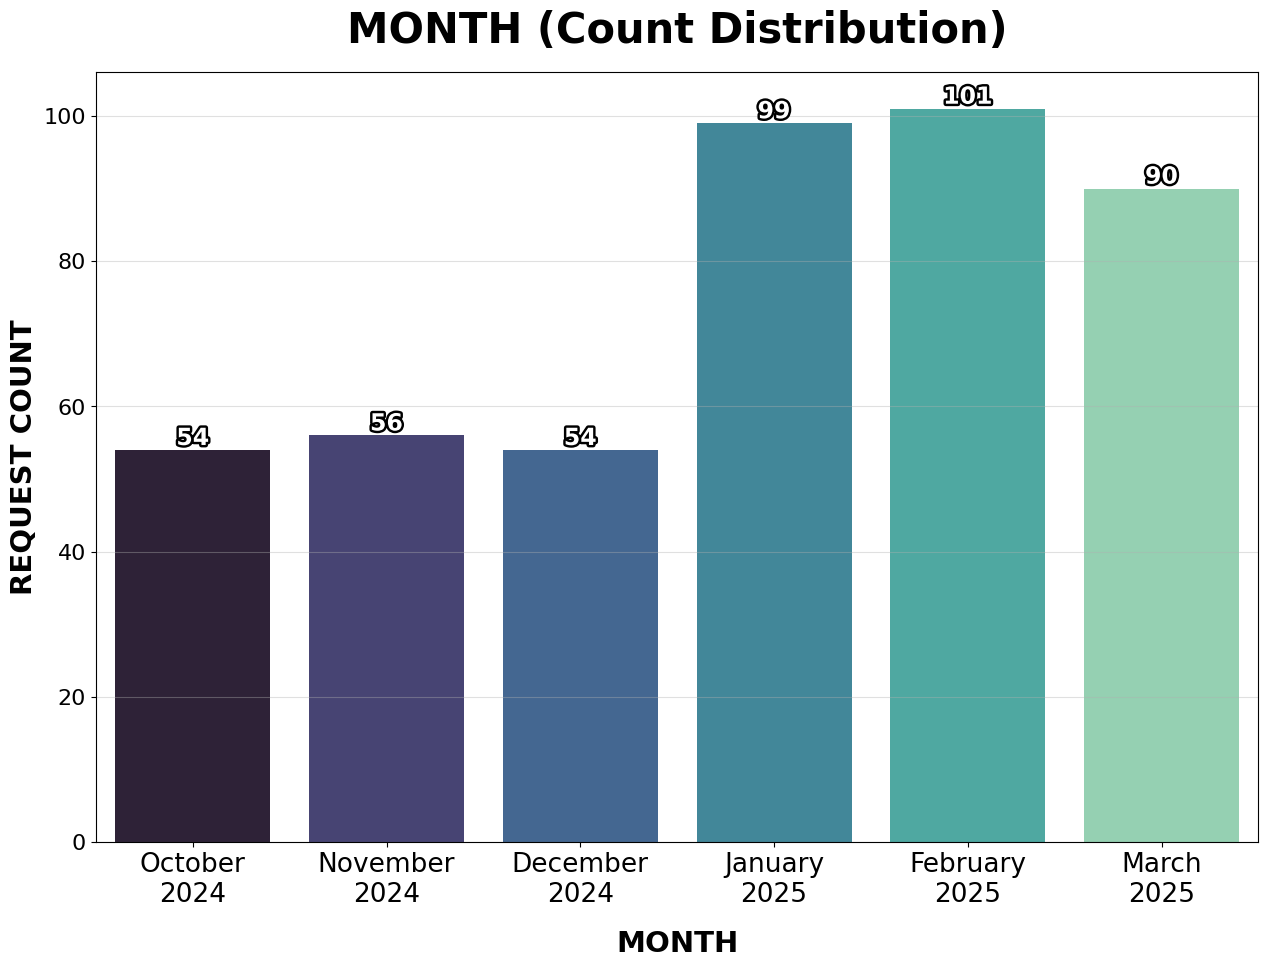

In [ ]:
# ==============================
#    MONTH Count Distribution
# ==============================

# Create the bar plot
fig, ax = plt.subplots(figsize=(15, 10)) # Create a figure and an axes object

month_year = requests
month_year['MONTH & YEAR'] = month_year['MONTH'] + ' ' + month_year['YEAR'].astype(str)

# Establishes count plot
month_plot = sns.countplot(month_year.sort_values(by='ENTRY DATE', ascending=True), x="MONTH & YEAR", ax=ax, palette='mako')

# Customize the plot
ax.set_title("MONTH (Count Distribution)", fontsize=30, fontweight='bold', pad=21) # Use ax to set the title
ax.set_xlabel('MONTH', fontsize=21, fontweight='bold', labelpad=16) # Use ax to set the x-axis label
ax.set_ylabel('REQUEST COUNT', fontsize=21, fontweight='bold') # Use ax to set the y-axis label
#ax.grid(True)
# Only show horizontal gridlines
ax.grid(axis='y', alpha=0.39)
plt.xticks(rotation=85, fontsize=19)  # Rotate x-axis labels for better readability
wrap_labels(ax, 8) # Pass the axes object to wrap_labels
plt.yticks(fontsize=16)

# Iterate through containers and add bar labels directly

#for container in month_plot.containers:
    #month_plot.bar_label(container)

for container in month_plot.containers:
    labels = [f'{int(bar.get_height())}' if bar.get_height() > 0 else '' for bar in container]
    month_plot.bar_label(
        container,
        labels=labels,
        label_type='edge',
        color='white',
        fontsize=17,
        fontweight='bold',
        path_effects=[
            path_effects.Stroke(linewidth=3.5, foreground='black'),
            path_effects.Normal()
        ]
    )


# Show the plot
plt.show()

## **DAY OF WEEK** Count Distribution

<ipython-input-11-e6afa91855a7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  day_plot = sns.countplot(requests.sort_values(by='DAY OF WEEK', ascending=True), x="DAY OF WEEK", ax=ax, palette='mako')
<ipython-input-11-e6afa91855a7>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order, rotation=0, ha="center")
<ipython-input-4-202c75df1ce7>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0, ha="center")


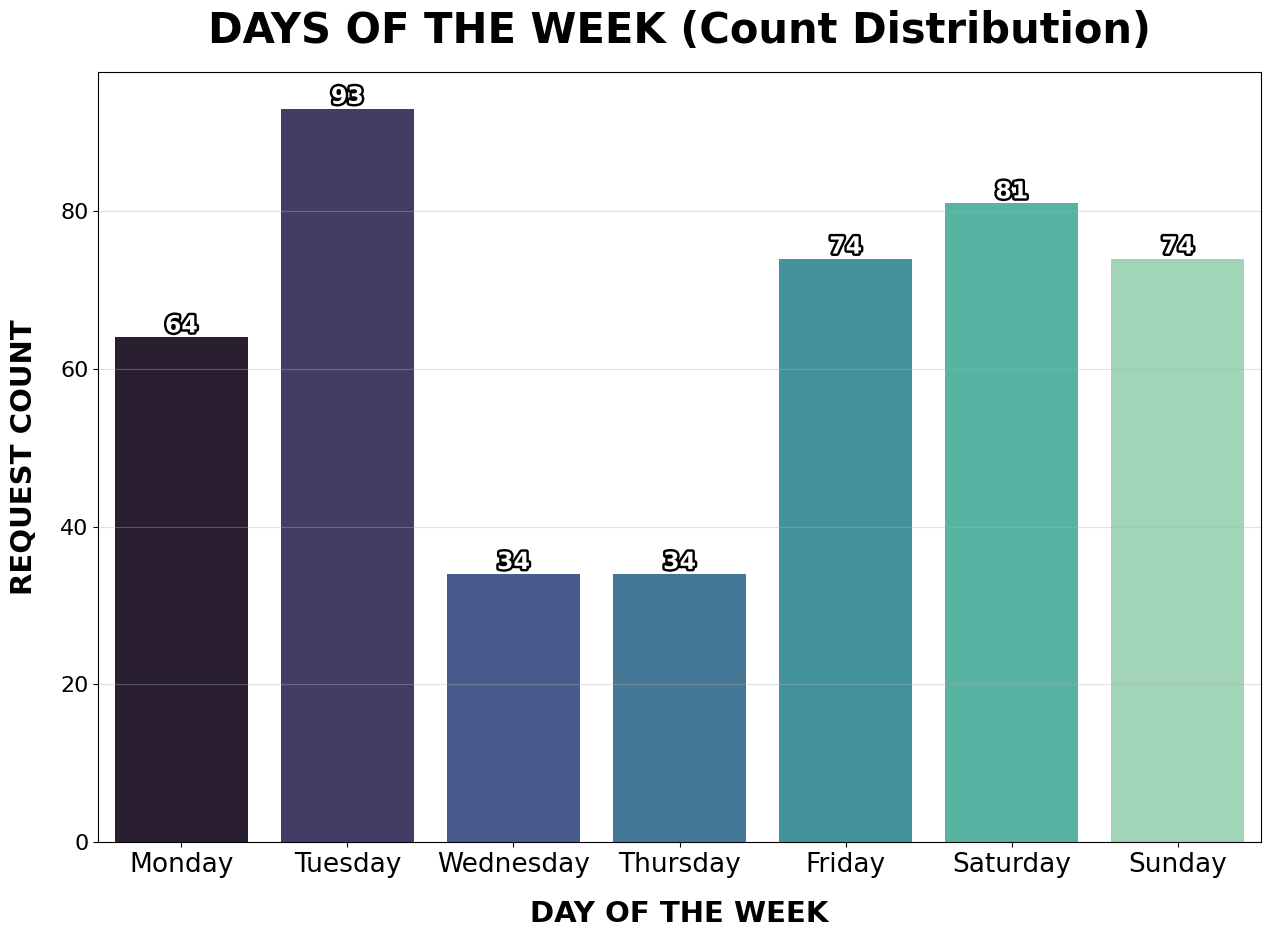

In [ ]:
# ====================================
#    DAY OF WEEK Count Distribution
# ====================================

# Create the bar plot
fig, ax = plt.subplots(figsize=(15, 10)) # Create a figure and an axes object

# Establishes count plot
day_plot = sns.countplot(requests.sort_values(by='DAY OF WEEK', ascending=True), x="DAY OF WEEK", ax=ax, palette='mako')

# Customize the plot
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticklabels(day_order, rotation=0, ha="center")
ax.set_title("DAYS OF THE WEEK (Count Distribution)", fontsize=30, fontweight='bold', pad=21) # Use ax to set the title
ax.set_xlabel('DAY OF THE WEEK', fontsize=21, fontweight='bold', labelpad=16) # Use ax to set the x-axis label
ax.set_ylabel('REQUEST COUNT', fontsize=21, fontweight='bold', labelpad=16) # Use ax to set the y-axis label
#ax.grid(True)
# Only show horizontal gridlines
ax.grid(axis='y', alpha=0.39)
plt.xticks(rotation=85, fontsize=19)  # Rotate x-axis labels for better readability
wrap_labels(ax, 10) # Pass the axes object to wrap_labels
plt.yticks(fontsize=16)

# Iterate through containers and add bar labels directly

#for container in day_plot.containers:
#    day_plot.bar_label(container)

for container in day_plot.containers:
    labels = [f'{int(bar.get_height())}' if bar.get_height() > 0 else '' for bar in container]
    day_plot.bar_label(
        container,
        labels=labels,
        label_type='edge',
        color='white',
        fontsize=17,
        fontweight='bold',
        path_effects=[
            path_effects.Stroke(linewidth=3.5, foreground='black'),
            path_effects.Normal()
        ]
    )
# Show the plot
plt.show()

## **HOUR** Count Distribution

<ipython-input-12-0c89dbeda2ee>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  hour_plot = sns.countplot(requests.sort_values(by='ENTRY DATE', ascending=True), x=hour_bins, ax=ax, palette='mako')


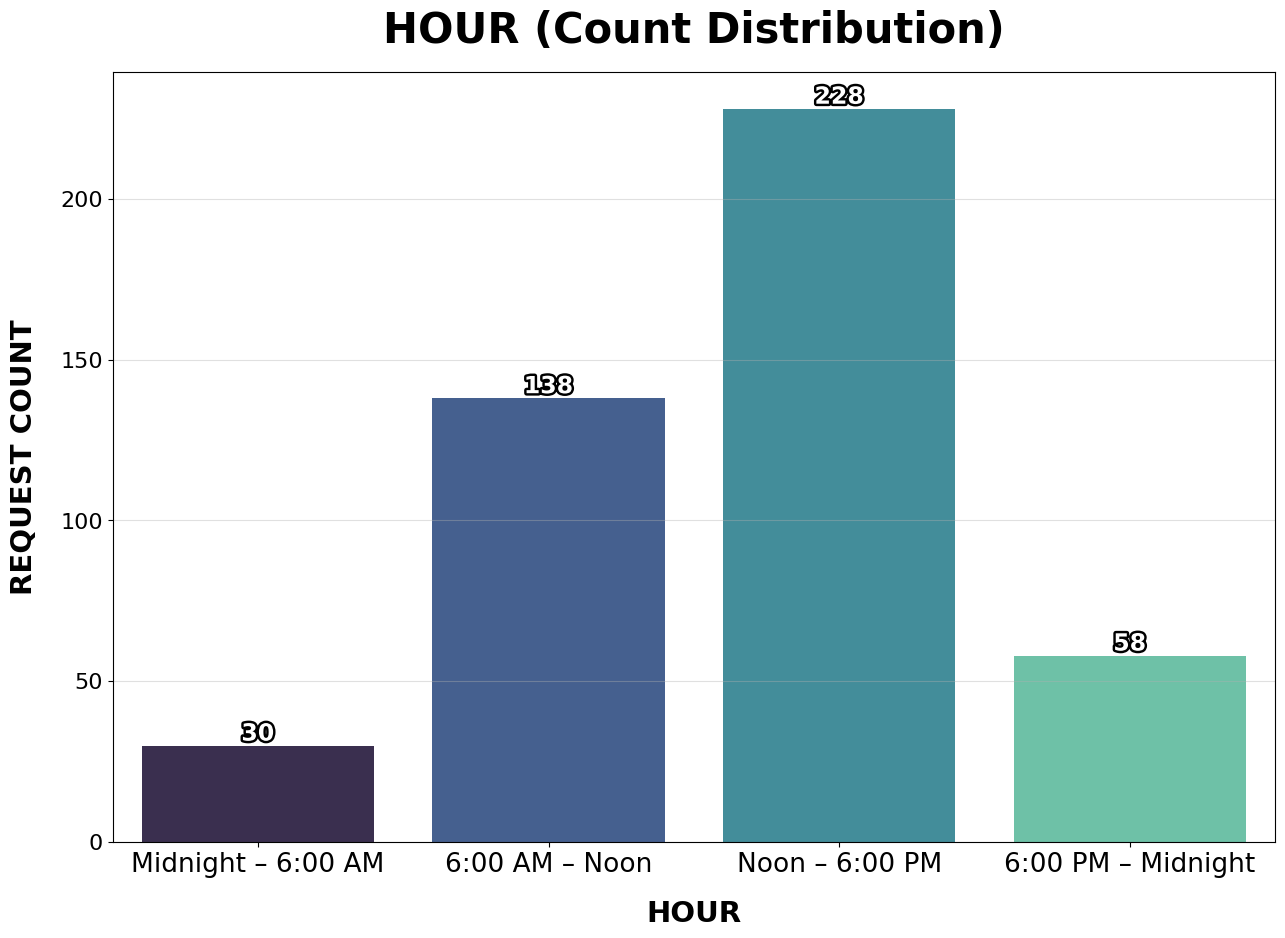

In [ ]:
# =============================
#    HOUR Count Distribution
# =============================

# Create the bar plot
fig, ax = plt.subplots(figsize=(15, 10)) # Create a figure and an axes object

# Create bins by 6-hour intervals
hour_bins = pd.cut(requests['ENTRY DATE'].dt.hour, bins=4,
                   labels=['Midnight – 6:00 AM', '6:00 AM – Noon', 'Noon – 6:00 PM', '6:00 PM – Midnight'])

# Establishes count plot
hour_plot = sns.countplot(requests.sort_values(by='ENTRY DATE', ascending=True), x=hour_bins, ax=ax, palette='mako')

# Customize the plot
ax.set_title("HOUR (Count Distribution)", fontsize=30, fontweight='bold', pad=21) # Use ax to set the title
ax.set_xlabel('HOUR', fontsize=21, fontweight='bold', labelpad=16) # Use ax to set the x-axis label
ax.set_ylabel('REQUEST COUNT', fontsize=21, fontweight='bold', labelpad=16) # Use ax to set the y-axis label
#ax.grid(True)
ax.grid(axis='y', alpha=0.39)   # Only show horizontal gridlines
plt.xticks(fontsize=19)  # Rotate x-axis labels for better readability
#wrap_labels(ax, 10) # Pass the axes object to wrap_labels
plt.yticks(fontsize=16)


# Iterate through containers and add bar labels directly

#for container in hour_plot.containers:
#    hour_plot.bar_label(container)

for container in hour_plot.containers:
    labels = [f'{int(bar.get_height())}' if bar.get_height() > 0 else '' for bar in container]
    hour_plot.bar_label(
        container,
        labels=labels,
        label_type='edge',
        color='white',
        fontsize=17,
        fontweight='bold',
        path_effects=[
            path_effects.Stroke(linewidth=3.5, foreground='black'),
            path_effects.Normal()
        ]
    )

# Show the plot
plt.show()

## **DAILY** Count Distribution

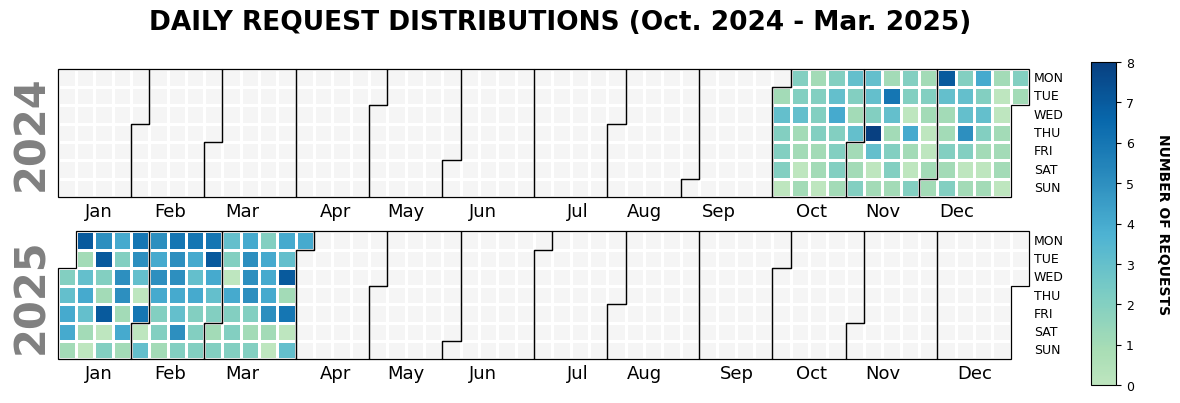

In [ ]:
# ==============================
#    DAILY Count Distribution
# ==============================


# Supresses font error
logging.getLogger('matplotlib.font_manager').disabled = True

# Pull correct date format
requests_mdy = requests
requests_mdy['DATE'] = requests_mdy['ENTRY DATE'].dt.date

# Group data by date and get the count for each date
daily_counts = requests_mdy.groupby('DATE')['DATE'].count()

# Convert the index to datetime if it's not already
daily_counts.index = pd.to_datetime(daily_counts.index)

# GETTING SPECIFIC RANGE OF GnBu COLORMAP
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))


cmap = plt.get_cmap('GnBu')
new_cmap = truncate_colormap(cmap, 0.3, 1.0)

# Plot Date Data
calplot.calplot(daily_counts,
                #suptitle = 'DAILY REQUEST COUNT',
                suptitle= "DAILY REQUEST DISTRIBUTIONS (Oct. 2024 - Mar. 2025)",
                suptitle_kws={'fontfamily': 'DejaVu Sans', 'fontweight': 'bold', 'fontsize': 19, 'y': 1.13},
                daylabels = ['MON','TUE','WED','THU', 'FRI', 'SAT', 'SUN'],
                cmap=new_cmap,
                #alpha=0.5,
                fillcolor='whitesmoke',
                edgecolor='black',
                linecolor='white',
                linewidth=0.9
                )

fig = plt.gcf()
cbar = fig.axes[-1]
cbar.set_ylabel('NUMBER OF REQUESTS', fontfamily='DejaVu Sans', fontweight='bold', rotation=270, labelpad=26)

for ax in fig.axes:
    for label in ax.get_yticklabels():
        label.set_fontfamily('DejaVu Sans')
        label.set_fontsize(9)
        #label.set_fontweight('bold')

        #label.set_ha('left')
    for label in ax.get_xticklabels():
        label.set_fontfamily('DejaVu Sans')
        label.set_fontsize(13)
        #label.set_fontweight('bold')
        label.set_ha('right')



plt.show()

### DAILY Count Distribution - **INDIVIDUAL MONTHS**

<ipython-input-14-f7226a7fb887>:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


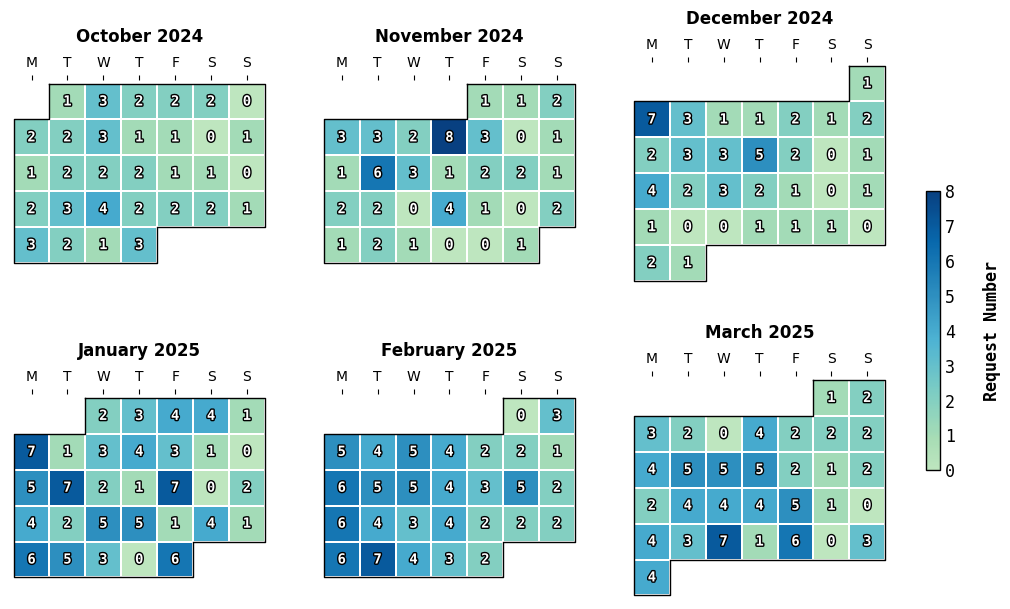

In [ ]:
# ===================================================
#     DAILY Count Distribution - INDIVIDUAL MONTHS
# ===================================================

# Patch matplotlib for july bug (if needed)
from matplotlib import MatplotlibDeprecationWarning
plt.cbook.MatplotlibDeprecationWarning = MatplotlibDeprecationWarning

# Group and sort months
requests_mdy['MONTH & YEAR'] = requests_mdy['MONTH'] + ' ' + requests_mdy['YEAR'].astype(str)
requests_mdy['ENTRY DATE'] = pd.to_datetime(requests_mdy['ENTRY DATE'])
month_ordered = requests_mdy[['MONTH & YEAR', 'YEAR']].drop_duplicates().sort_values(by='YEAR')

months_2024 = month_ordered[month_ordered['YEAR'] == 2024]['MONTH & YEAR'].tolist()
months_2025 = month_ordered[month_ordered['YEAR'] == 2025]['MONTH & YEAR'].tolist()

# Get overall max request count
daily_counts_all = requests_mdy.groupby(requests_mdy['ENTRY DATE'].dt.date)['ENTRY DATE'].count()
overall_max_requests = daily_counts_all.max()

# Set up subplots
fig, axs = plt.subplots(nrows=2,
                        ncols=max(len(months_2024), len(months_2025)),
                        figsize=(4 * max(len(months_2024), len(months_2025)), 7),
                        gridspec_kw=dict(wspace=0.2, hspace=0.4)  # controls spacing between subplots
                        )

# Ensure axs is 2D array even if fewer columns
axs = np.atleast_2d(axs)


# GETTING SPECIFIC RANGE OF GnBu COLORMAP
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))


cmap = plt.get_cmap('GnBu')
new_cmap = truncate_colormap(cmap, 0.3, 1.0)

# Plot function
def plot_month(i_month, ax):
    year = requests_mdy.loc[requests_mdy['MONTH & YEAR'] == i_month, 'YEAR'].iloc[0]
    month_name = requests_mdy.loc[requests_mdy['MONTH & YEAR'] == i_month, 'MONTH'].iloc[0]
    month = datetime.datetime.strptime(month_name, '%B').month
    start_date = datetime.date(year, month, 1)
    end_date = datetime.date(year, month, 28) + datetime.timedelta(days=4)
    end_date = end_date.replace(day=1) - datetime.timedelta(days=1)
    dates = pd.date_range(start=start_date, end=end_date, freq='D')

    current_month_data = requests_mdy[requests_mdy['MONTH & YEAR'] == i_month]
    daily_counts = current_month_data.groupby(current_month_data['ENTRY DATE'].dt.date)['ENTRY DATE'].count()
    data_dict = daily_counts.to_dict()
    data_values = [data_dict.get(d.date(), 0) for d in dates]


    july.month_plot(
        dates=dates,
        year=year,
        data=data_values,
        #title="Daily Request Distributions (Oct. 2024 - Mar. 2025)",
        cmap=new_cmap,
        value_label=True,
        cmin=0,
        cmax=overall_max_requests,
        colorbar=False,
        ax=ax
    )

    for text in ax.texts:
        text.set_fontsize(10)
        text.set_fontweight('bold')
        text.set_color('white')
        text.set_path_effects([
            path_effects.Stroke(linewidth=2.0, foreground='black'),
            path_effects.Normal()
    ])

    # Align month title manually
    ax.set_title(
        f"{month_name} {year}",
        fontsize=12,
        fontweight='bold',
        fontfamily='DejaVu Sans',
        pad=10,
        loc='center'
    )

    # Remove week numbers
    ax.set_yticks([])
    ax.set_yticklabels([])


# Plot each month
for i, month in enumerate(months_2024):
    plot_month(month, axs[0, i])
for i, month in enumerate(months_2025):
    plot_month(month, axs[1, i])

# Hide unused subplots
for i in range(len(months_2024), axs.shape[1]):
    axs[0, i].axis('off')
for i in range(len(months_2025), axs.shape[1]):
    axs[1, i].axis('off')

# Shared colorbar
norm = Normalize(vmin=0, vmax=overall_max_requests)
sm = plt.cm.ScalarMappable(cmap=new_cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.015, pad=0.04)
cbar.set_label("Request Number", rotation=90, labelpad=20, fontweight='bold')


# fig.suptitle(
#     "DAILY REQUEST DISTRIBUTIONS (Oct. 2024 - Mar. 2025)",
#     fontsize=19,
#     fontweight='bold',
#     fontfamily='DejaVu Sans',
#     y=1.0
# )

plt.tight_layout()
plt.show()


# **BIVARIATE ANALYSIS**

## **Request Count by MONTH and AGE**

<ipython-input-12-8e3d4b63aa55>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  month_year['MONTH & YEAR'] = pd.to_datetime(month_year['MONTH & YEAR'])


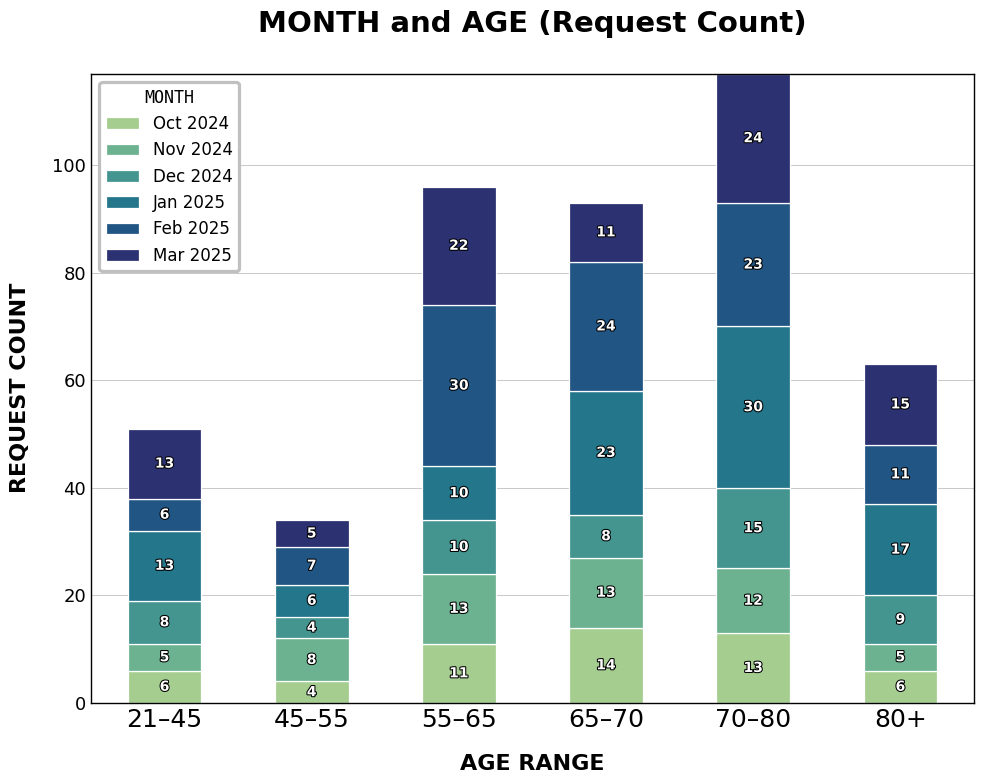

In [ ]:
# =====================================
#     Request Count by MONTH and AGE
# =====================================

# Prepare data
month_year['MONTH & YEAR'] = pd.to_datetime(month_year['MONTH & YEAR'])
month_year['MONTH & YEAR (STR)'] = month_year['MONTH & YEAR'].dt.strftime('%b %Y')

# Preserve correct order of months
ordered_months = (
    month_year['MONTH & YEAR']
    .sort_values()
    .dt.strftime('%b %Y')
    .unique()
)
month_year['MONTH & YEAR (STR)'] = pd.Categorical(
    month_year['MONTH & YEAR (STR)'],
    categories=ordered_months,
    ordered=True
)

# === Stacked bar plot ===
fig, ax = plt.subplots(figsize=(10, 8))
age_month_crosstab = pd.crosstab(
    month_year['AGE RANGE'],
    month_year['MONTH & YEAR (STR)']
).sort_index(axis=0)

bars = age_month_crosstab.plot(
    kind='bar',
    stacked=True,
    colormap='crest',
    ax=ax,
    edgecolor='white',
    linewidth=0.9
)

# === Font and title settings ===
ax.set_title(
    'MONTH and AGE (Request Count)',
    fontweight='bold',
    fontsize=21,
    fontfamily='DejaVu Sans'
)
ax.set_xlabel(
    'AGE RANGE',
    fontweight='bold',
    fontsize=16,
    fontfamily='DejaVu Sans',
    labelpad=16
)
ax.set_ylabel(
    'REQUEST COUNT',
    fontweight='bold',
    fontsize=16,
    fontfamily='DejaVu Sans',
    labelpad=16
)

# === Add white bold labels with black outline ===
for container in bars.containers:
    labels = [f'{int(v)}' if v > 0 else '' for v in container.datavalues]
    bars.bar_label(
        container,
        labels=labels,
        label_type='center',
        color='white',
        fontweight='bold',
        fontsize=10,
        fontfamily='DejaVu Sans',
        path_effects=[
            path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()
        ]
    )

for label in ax.get_yticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(13)
    #label.set_ha('left')
    label.set_rotation(0)

for label in ax.get_xticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(18)
    label.set_ha('center')
    label.set_rotation(0)

# === Gridlines ===
ax.yaxis.grid(True, linestyle='-', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Replace hyphen with en dash
ax.set_xticklabels([
    label.get_text().replace('-', '–') for label in ax.get_xticklabels()
])


# === Legend ===
ax.legend(title='MONTH', frameon=True, framealpha=1, edgecolor='silver', prop={'family': 'DejaVu Sans'}, loc='upper left')
legend = ax.get_legend()
legend.get_frame().set_linewidth(2.3)

# === Tight layout ===

plt.tight_layout()
plt.show()


## **Request Count by MONTH and DISCOVERY METHOD**

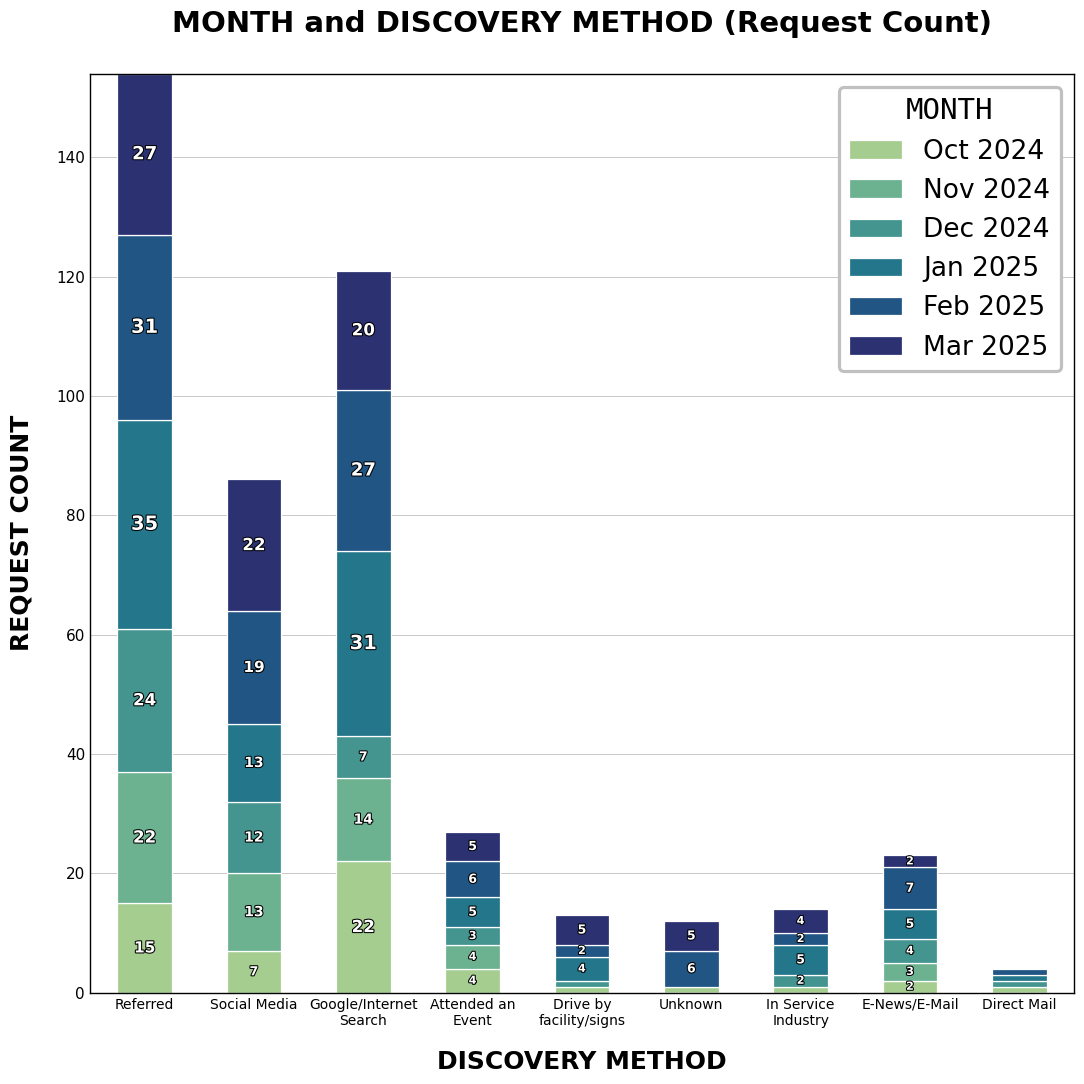

In [ ]:
# ==================================================
#     Request Count by MONTH and DISCOVERY METHOD
# ==================================================

# === Clean & format month column ===
month_year['MONTH & YEAR'] = pd.to_datetime(month_year['MONTH & YEAR'])
month_year['MONTH & YEAR (STR)'] = month_year['MONTH & YEAR'].dt.strftime('%b %Y')

# Ensure months are in correct order
ordered_months = (
    month_year['MONTH & YEAR']
    .sort_values()
    .dt.strftime('%b %Y')
    .unique()
)
month_year['MONTH & YEAR (STR)'] = pd.Categorical(
    month_year['MONTH & YEAR (STR)'],
    categories=ordered_months,
    ordered=True
)

# === Pivot data for stacked plot ===
discovery_crosstab = pd.crosstab(
    month_year['DISCOVERY METHOD'],
    month_year['MONTH & YEAR (STR)']
).sort_values(by=ordered_months[-1], ascending=False)

# === Plot ===
fig, ax = plt.subplots(figsize=(11, 11))
bars = discovery_crosstab.plot(
    kind='bar',
    stacked=True,
    colormap='crest',
    ax=ax,
    edgecolor='white',
    linewidth=0.9
)

# === Title and axis labels ===
ax.set_title(
    'MONTH and DISCOVERY METHOD (Request Count)',
    fontweight='bold',
    fontsize=21,
    fontfamily='DejaVu Sans'
)
ax.set_xlabel(
    'DISCOVERY METHOD',
    fontweight='bold',
    fontfamily='DejaVu Sans',
    fontsize=18,
    labelpad=16
)
ax.set_ylabel(
    'REQUEST COUNT',
    fontweight='bold',
    fontfamily='DejaVu Sans',
    fontsize=18,
    labelpad=16
)

for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 1:
            # Dynamically scale font size based on the bar height
            # You can tune these numbers for your preferred min/max sizes and scaling sensitivity
            min_font = 8
            max_font = 14
            # Calculate a dynamic fontsize, scale nonlinearly for better balance
            fontsize = int(min(max_font, max(min_font, height * 0.20 + min_font)))

            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(
                x, y, f'{int(height)}',
                ha='center', va='center',
                fontsize=fontsize,
                color='white',
                fontweight='bold',
                fontfamily='DejaVu Sans',
                path_effects=[
                    path_effects.Stroke(linewidth=1.5, foreground='black'),
                    path_effects.Normal()
                ]
            )


# === Grid and style ===
ax.yaxis.grid(True, linestyle='-', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=9)

# === Legend ===
ax.legend(
    title='MONTH',
    frameon=True,
    prop={'family': 'DejaVu Sans','size':19},  title_fontsize=21, loc='upper right',
    framealpha=1, edgecolor='silver'
)

legend = ax.get_legend()
legend.get_frame().set_linewidth(2.3)


for label in ax.get_xticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(10)

for label in ax.get_yticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(11)
    #label.set_ha('left')
    label.set_rotation(0)


wrap_labels(ax, width=12)

# === Final layout ===
plt.tight_layout()
plt.show()


## **Request Count by MONTH and ASSISTANCE TYPE**

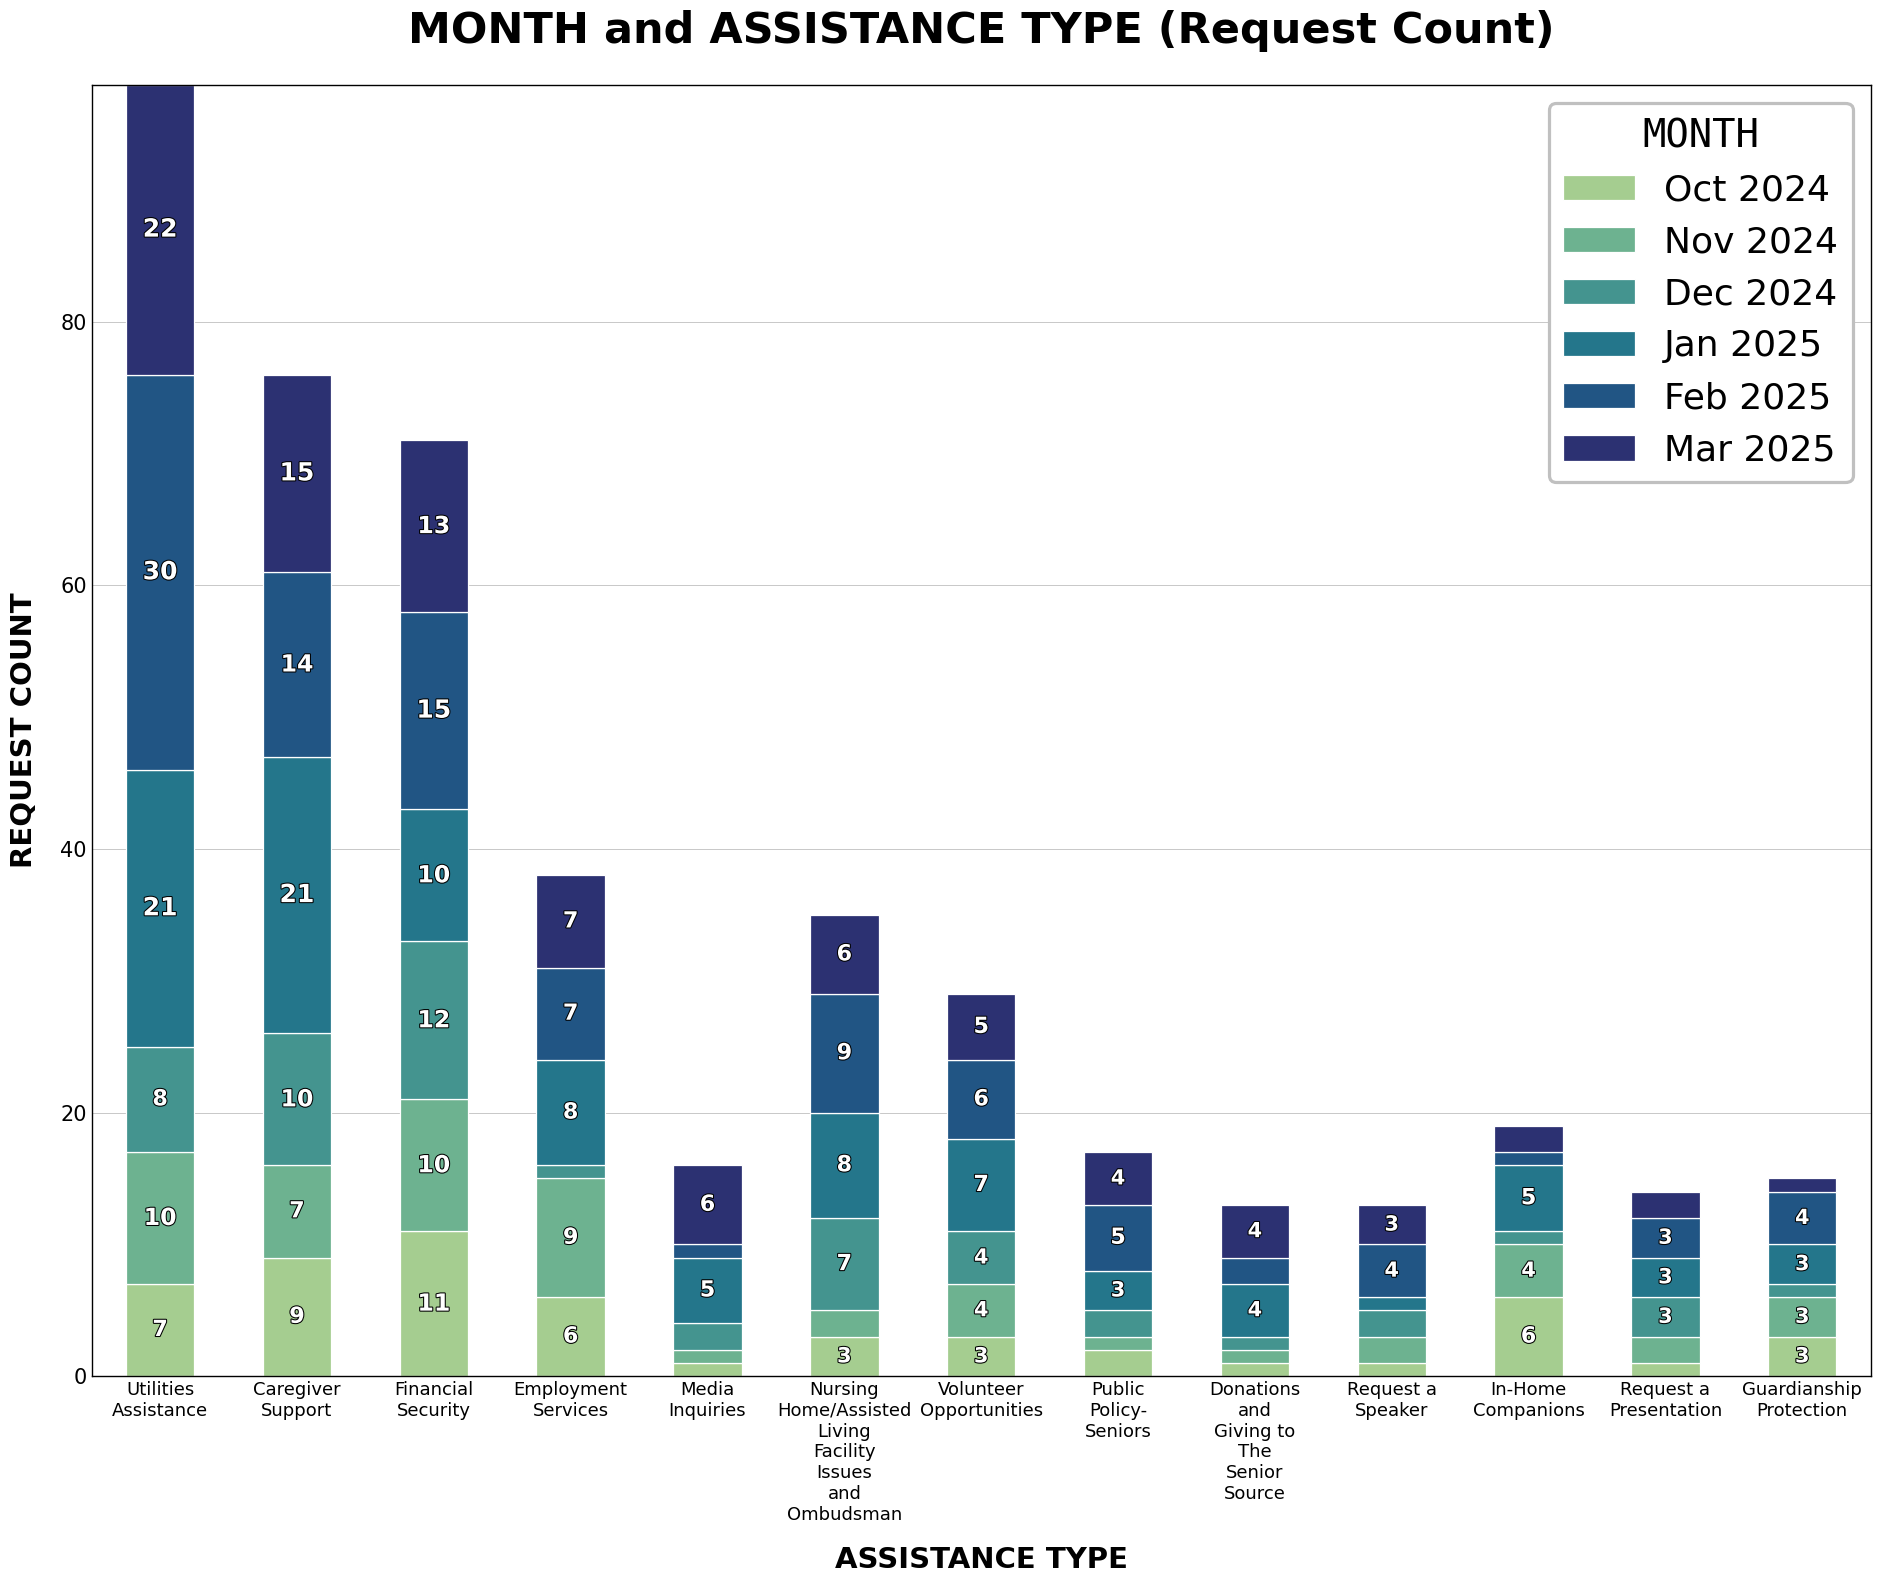

In [ ]:
# =================================================
#     Request Count by MONTH and ASSISTANCE TYPE
# =================================================

# === Prepare MONTH column ===
month_year['MONTH & YEAR'] = pd.to_datetime(month_year['MONTH & YEAR'])
month_year['MONTH & YEAR (STR)'] = month_year['MONTH & YEAR'].dt.strftime('%b %Y')
ordered_months = (
    month_year['MONTH & YEAR']
    .sort_values()
    .dt.strftime('%b %Y')
    .unique()
)
month_year['MONTH & YEAR (STR)'] = pd.Categorical(
    month_year['MONTH & YEAR (STR)'],
    categories=ordered_months,
    ordered=True
)

# === Crosstab for assistance type ===
assist_month_crosstab = pd.crosstab(
    month_year['ASSISTANCE TYPE'],
    month_year['MONTH & YEAR (STR)']
).sort_values(by=ordered_months[-1], ascending=False)

# === Plot ===
fig, ax = plt.subplots(figsize=(19, 16))
bars = assist_month_crosstab.plot(
    kind='bar',
    stacked=True,
    colormap='crest',
    ax=ax,
    edgecolor='white',
    linewidth=0.9
)

# === Titles and labels ===
ax.set_title(
    'MONTH and ASSISTANCE TYPE (Request Count)',
    fontweight='bold',
    fontsize=31,
    fontfamily='DejaVu Sans'
)
ax.set_xlabel(
    'ASSISTANCE TYPE',
    fontweight='bold',
    fontsize=21,
    fontfamily='DejaVu Sans',
    labelpad=16
)
ax.set_ylabel(
    'REQUEST COUNT',
    fontweight='bold',
    fontsize=21,
    fontfamily='DejaVu Sans',
    labelpad=16
)

# === Add white bold bar labels with black outline (dynamic font size) ===
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height >= 3:
            # Dynamically adjust font size based on height
            min_font = 15
            max_font = 18
            fontsize = int(min(max_font, max(min_font, height * 0.20 + min_font)))

            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(
                x, y, f'{int(height)}',
                ha='center', va='center',
                fontsize=fontsize,
                color='white',
                fontweight='bold',
                fontfamily='DejaVu Sans',
                path_effects=[
                    path_effects.Stroke(linewidth=1.5, foreground='black'),
                    path_effects.Normal()
                ]
            )


# === Gridlines and formatting ===
ax.yaxis.grid(True, linestyle='-', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)
ax.tick_params(axis='y', labelsize=16)
wrap_labels(ax, 9)

for label in ax.get_xticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(13)

for label in ax.get_yticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(15)
    #label.set_ha('left')
    label.set_rotation(0)



# === Legend ===
ax.legend(title='MONTH', frameon=True, prop={'family': 'DejaVu Sans', 'size':26},  title_fontsize=28, loc='upper right', framealpha=1, edgecolor='silver')

legend = ax.get_legend()
legend.get_frame().set_linewidth(2.3)

# === Tight layout ===
plt.tight_layout()
plt.show()

## **Request Count by AGE and DISCOVERY METHOD**


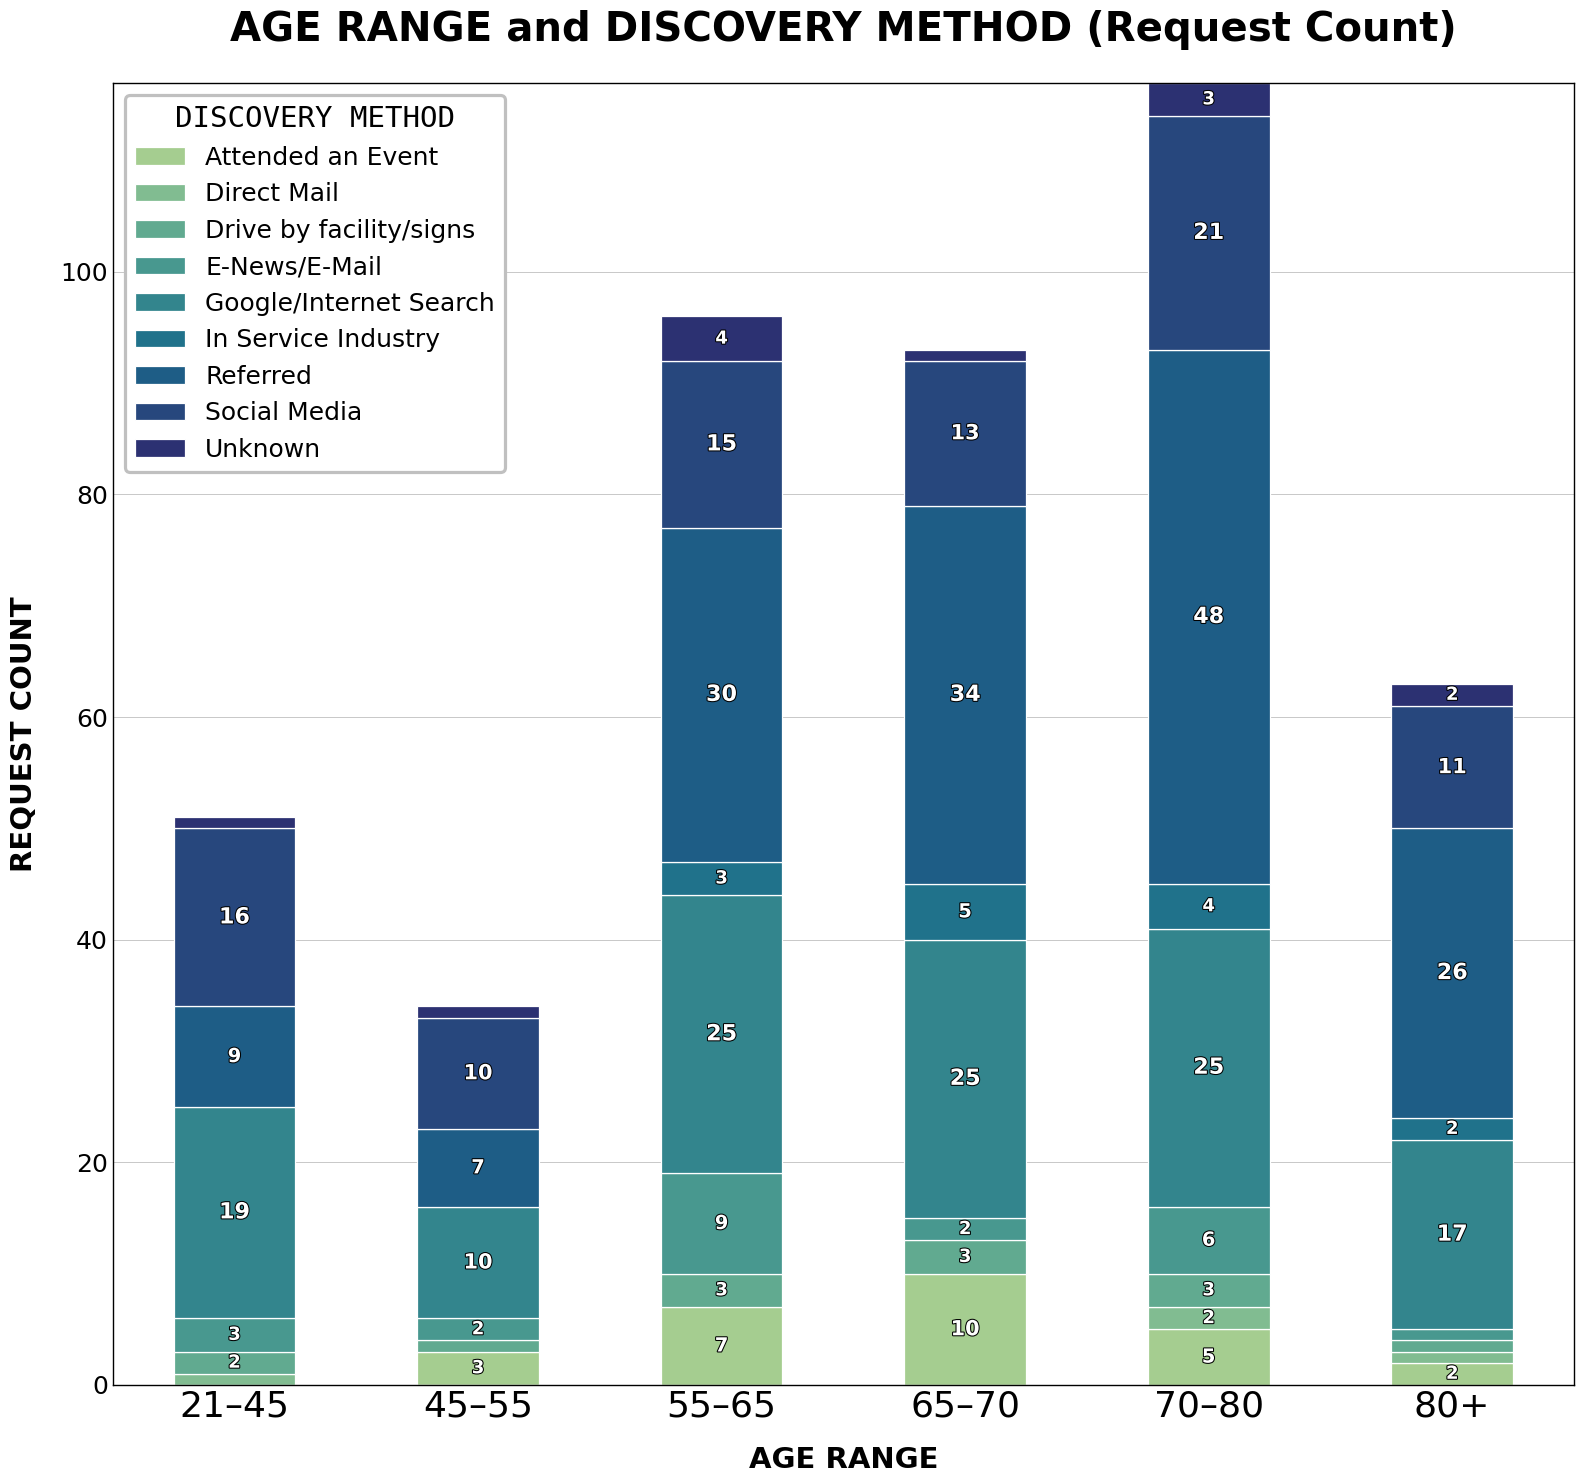

In [ ]:
# ================================================
#     Request Count by AGE and DISCOVERY METHOD
# ================================================

# === Crosstab for AGE RANGE and DISCOVERY METHOD ===
age_discovery_crosstab = pd.crosstab(
    month_year['AGE RANGE'],      # x-axis (rows)
    month_year['DISCOVERY METHOD']  # stacked bars (columns)
).sort_index()

# === Plot ===
fig, ax = plt.subplots(figsize=(16, 15))
bars = age_discovery_crosstab.plot(
    kind='bar',
    stacked=True,
    colormap='crest',
    ax=ax,
    edgecolor='white',
    linewidth=0.9
)

# === Titles and labels ===
ax.set_title(
    'AGE RANGE and DISCOVERY METHOD (Request Count)',
    fontweight='bold',
    fontsize=29,
    fontfamily='DejaVu Sans'
)
ax.set_xlabel(
    'AGE RANGE',
    fontweight='bold',
    fontfamily='DejaVu Sans',
    fontsize=21,
    labelpad=16
)
ax.set_ylabel(
    'REQUEST COUNT',
    fontweight='bold',
    fontfamily='DejaVu Sans',
    fontsize=21,
    labelpad=16
)

# === Label bars with dynamic font sizes ===
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 1:
            min_font = 13
            max_font = 16
            fontsize = int(min(max_font, max(min_font, height * 0.20 + min_font)))

            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(
                x, y, f'{int(height)}',
                ha='center', va='center',
                fontsize=fontsize,
                color='white',
                fontweight='bold',
                fontfamily='DejaVu Sans',
                path_effects=[
                    path_effects.Stroke(linewidth=1.5, foreground='black'),
                    path_effects.Normal()
                ]
            )

# === Grid and style ===
ax.yaxis.grid(True, linestyle='-', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

for label in ax.get_xticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(26)
    label.set_ha('center')
    label.set_rotation(0)

for label in ax.get_yticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(18)
    #label.set_ha('left')
    label.set_rotation(0)


# Replace hyphen with en dash
ax.set_xticklabels([
    label.get_text().replace('-', '–') for label in ax.get_xticklabels()
])

# === Legend ===
ax.legend(
    title='DISCOVERY METHOD',
    frameon=True,
    prop={'family': 'DejaVu Sans', 'size':18},
    title_fontsize=21,
    loc='upper left',
    framealpha=1, edgecolor='silver'
)

legend = ax.get_legend()
legend.get_frame().set_linewidth(2.3)

# === Final layout ===
plt.tight_layout()
plt.show()


## **Request Count by AGE and ASSISTANCE TYPE**

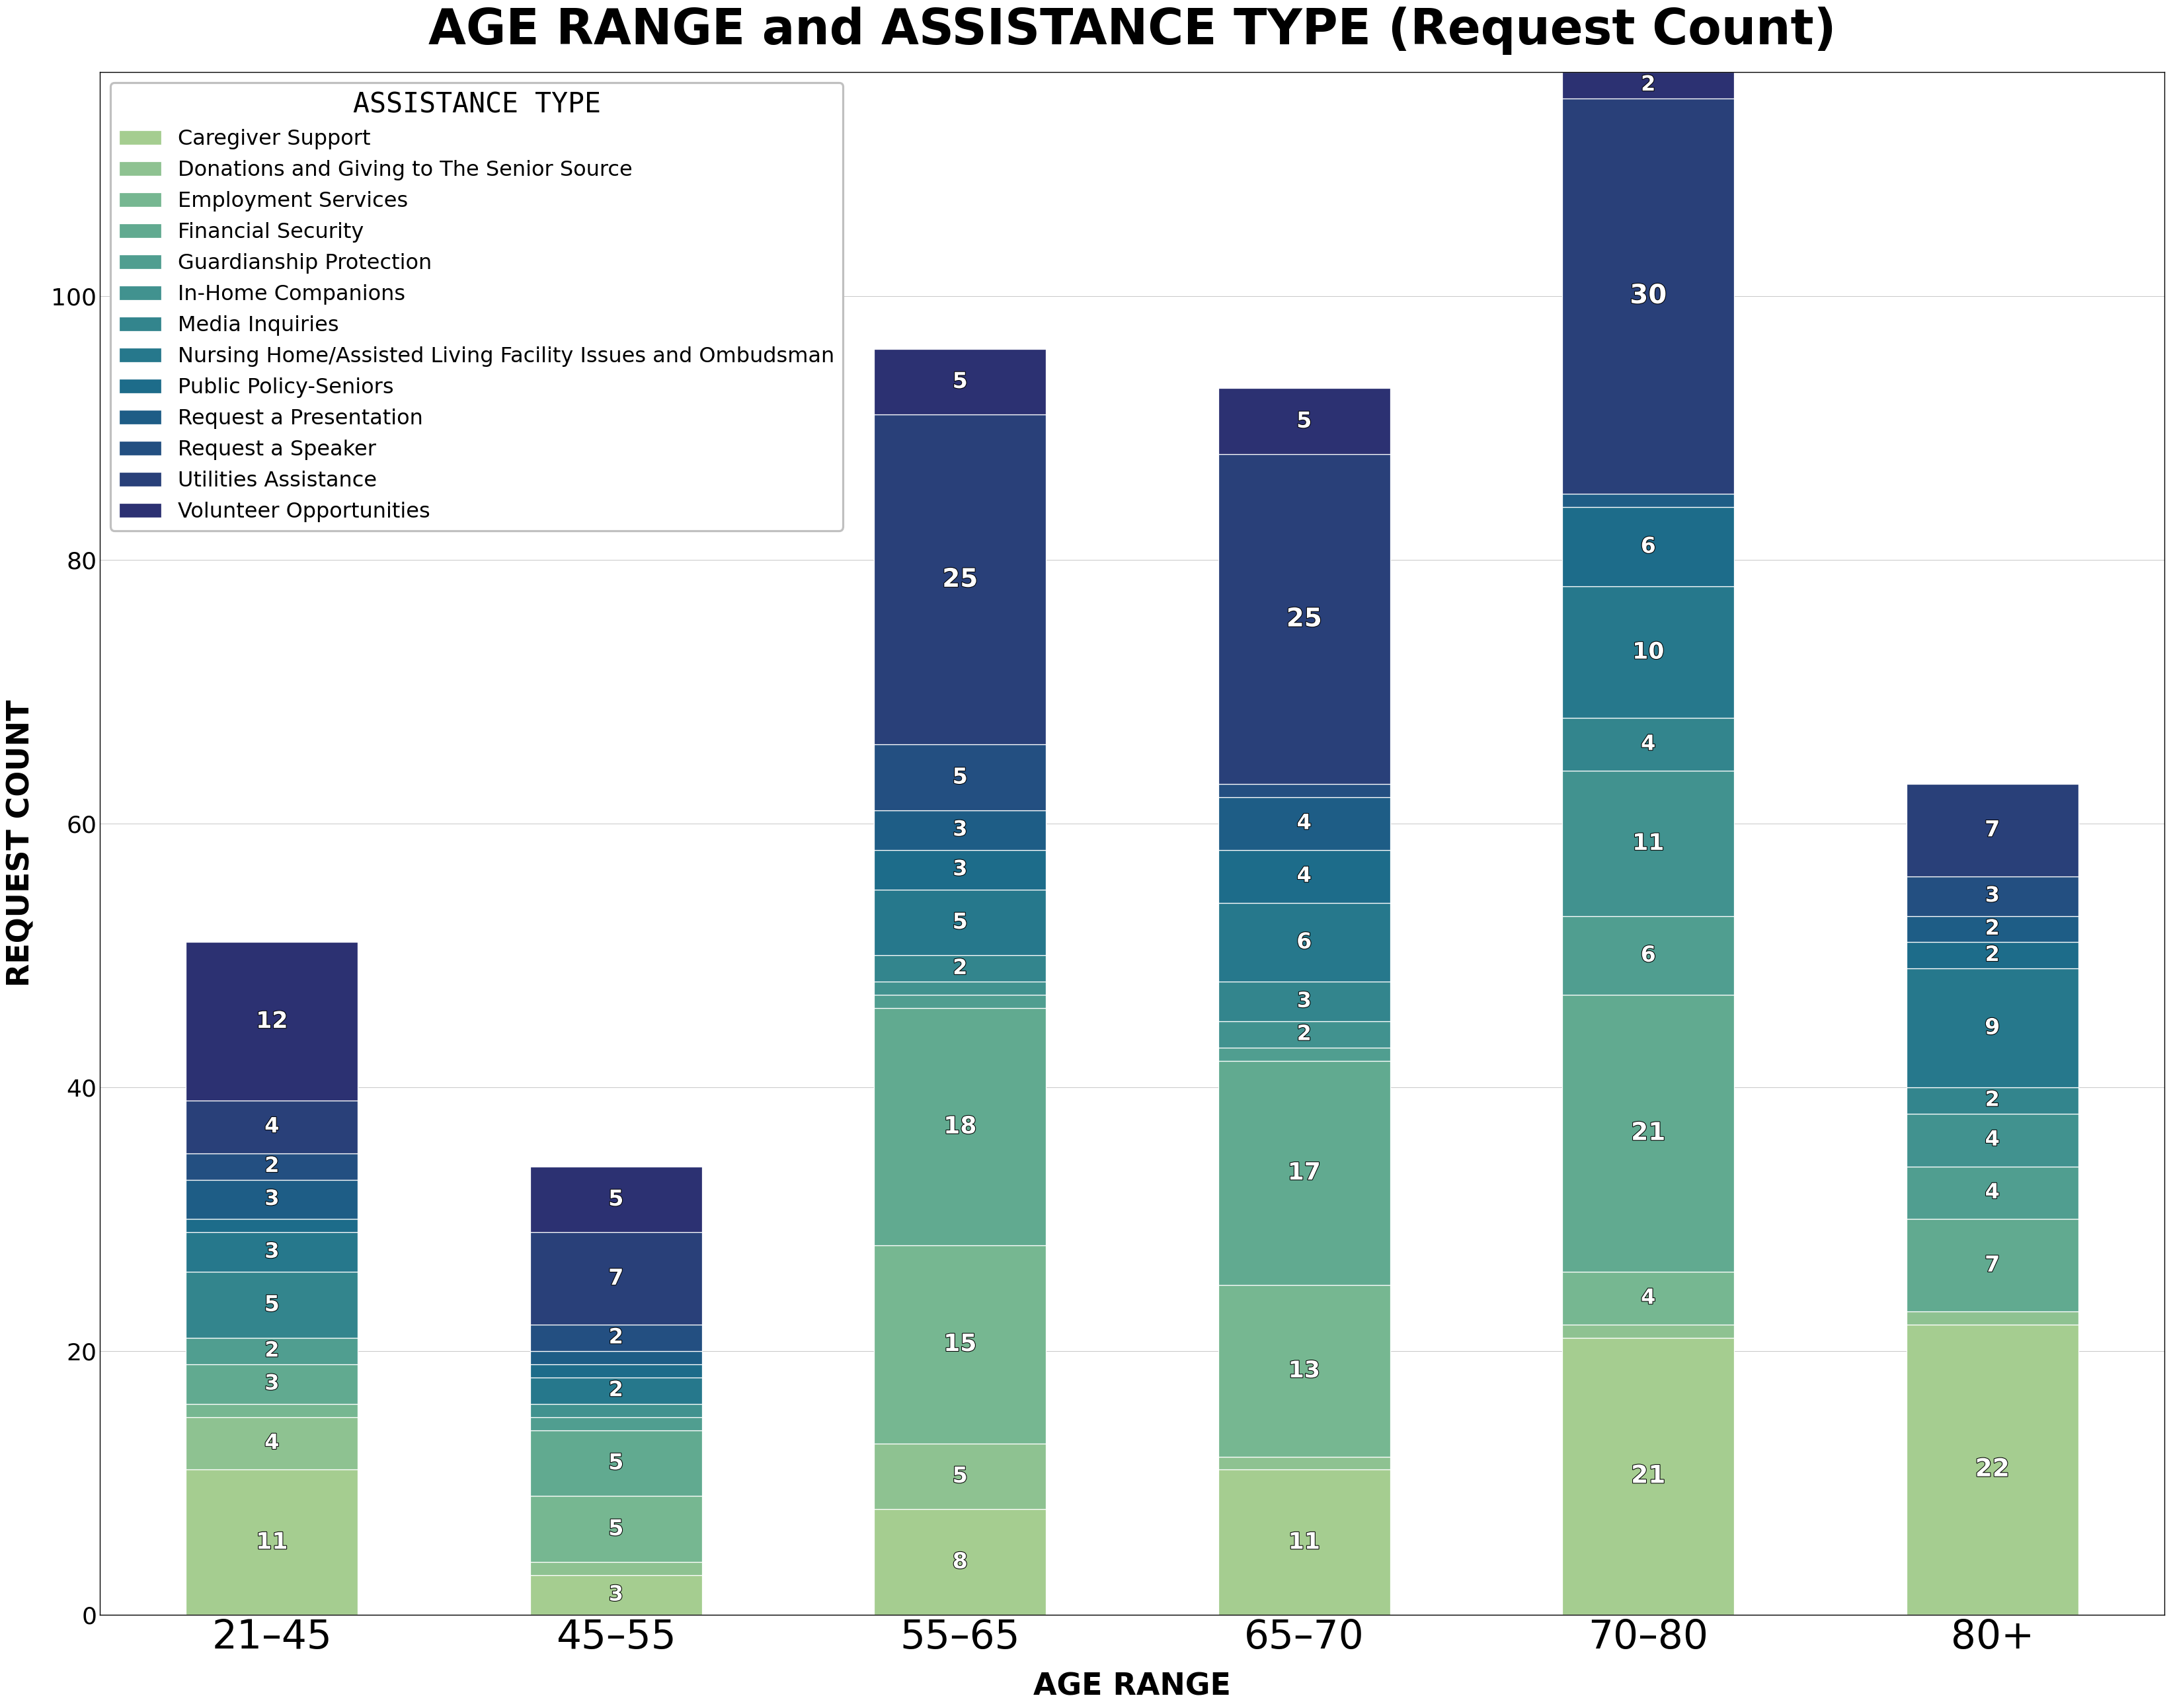

In [ ]:
# ===============================================
#     Request Count by AGE and ASSISTANCE TYPE
# ===============================================

# === Crosstab for AGE RANGE and ASSISTANCE TYPE ===
age_assist_crosstab = pd.crosstab(
    month_year['AGE RANGE'],           # x-axis
    month_year['ASSISTANCE TYPE']     # stacked categories
).sort_index()

# === Plot ===
fig, ax = plt.subplots(figsize=(33, 26))
bars = age_assist_crosstab.plot(
    kind='bar',
    stacked=True,
    colormap='crest',
    ax=ax,
    edgecolor='white',
    linewidth=0.9
)

# === Titles and labels ===
ax.set_title(
    'AGE RANGE and ASSISTANCE TYPE (Request Count)',
    fontweight='bold',
    fontsize=53,
    fontfamily='DejaVu Sans'
)
ax.set_xlabel(
    'AGE RANGE',
    fontweight='bold',
    fontfamily='DejaVu Sans',
    fontsize=33,
    labelpad=16
)
ax.set_ylabel(
    'REQUEST COUNT',
    fontweight='bold',
    fontfamily='DejaVu Sans',
    fontsize=33,
    labelpad=16
)

# === Add dynamic bar labels ===
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 1:
            min_font = 23
            max_font = 29
            fontsize = int(min(max_font, max(min_font, height * 0.20 + min_font)))

            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(
                x, y, f'{int(height)}',
                ha='center', va='center',
                fontsize=fontsize,
                color='white',
                fontweight='bold',
                fontfamily='DejaVu Sans',
                path_effects=[
                    path_effects.Stroke(linewidth=1.5, foreground='black'),
                    path_effects.Normal()
                ]
            )

# === Grid and formatting ===
ax.yaxis.grid(True, linestyle='-', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)


# Replace hyphen with en dash
ax.set_xticklabels([
    label.get_text().replace('-', '–') for label in ax.get_xticklabels()
])

for label in ax.get_xticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(30)
    label.set_ha('center')
    label.set_rotation(0)

# === Legend ===
ax.legend(
    title='ASSISTANCE TYPE',
    frameon=True,
    prop={'family': 'DejaVu Sans', 'size':23},
    title_fontsize=30,
    loc='upper left',
    framealpha=1, edgecolor='silver'
)

legend = ax.get_legend()
legend.get_frame().set_linewidth(2.3)

for label in ax.get_xticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(43)
    label.set_ha('center')
    label.set_rotation(0)

for label in ax.get_yticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(26)
    #label.set_ha('left')
    label.set_rotation(0)

# === Final layout ===
plt.tight_layout()
plt.show()


## **Request Count by AGE and TIME**

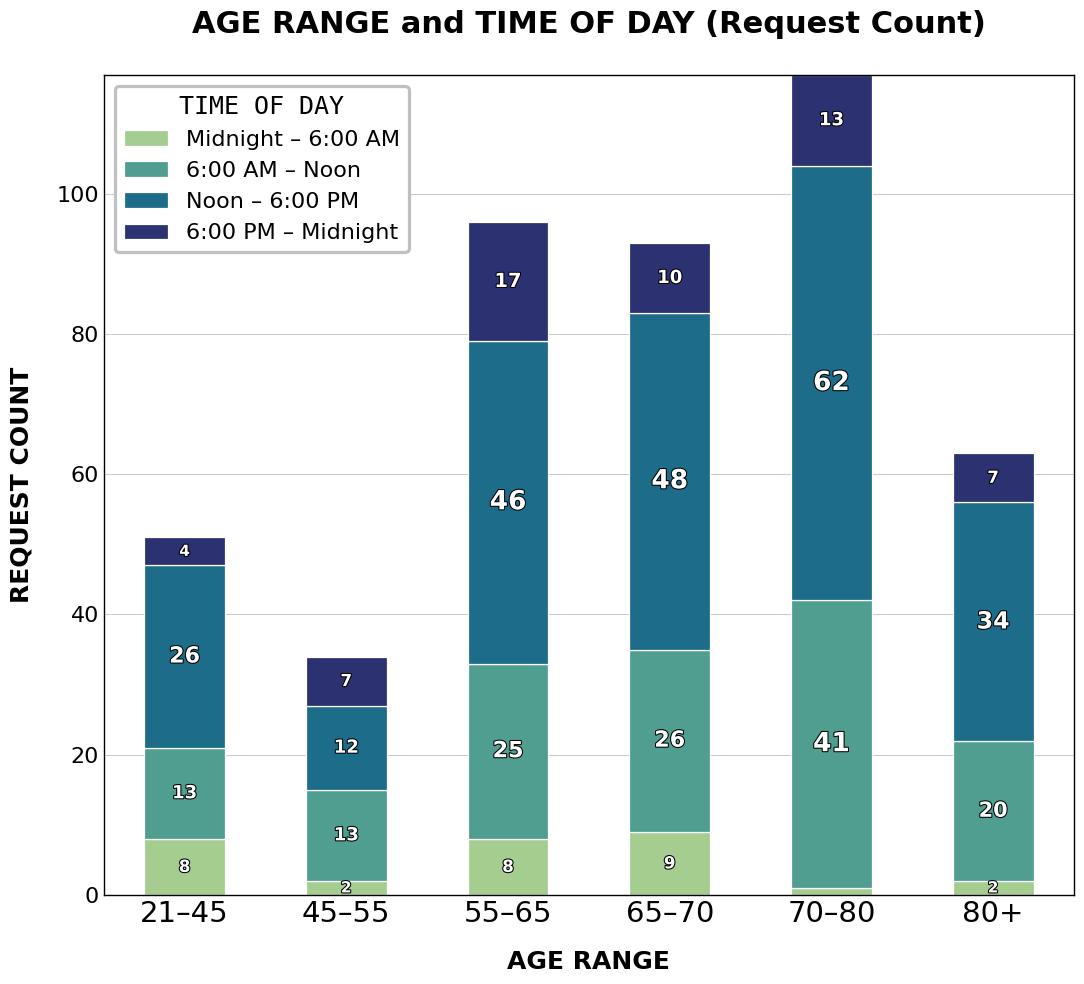

In [ ]:
# ====================================
#     Request Count by AGE and TIME
# ====================================

# === Create TIME OF DAY bins using 6-hour intervals ===
requests['TIME OF DAY'] = pd.cut(
    requests['ENTRY DATE'].dt.hour,
    bins=[0, 6, 12, 18, 24],
    labels=['Midnight – 6:00 AM', '6:00 AM – Noon', 'Noon – 6:00 PM', '6:00 PM – Midnight'],
    right=False
)

# === Crosstab for AGE RANGE and TIME OF DAY ===
age_time_crosstab = pd.crosstab(
    requests['AGE RANGE'],          # x-axis
    requests['TIME OF DAY']         # stacked bars
).sort_index()

# === Plot ===
fig, ax = plt.subplots(figsize=(11, 10))
bars = age_time_crosstab.plot(
    kind='bar',
    stacked=True,
    colormap='crest',
    ax=ax,
    edgecolor='white',
    linewidth=0.9
)

# === Titles and labels ===
ax.set_title(
    'AGE RANGE and TIME OF DAY (Request Count)',
    fontweight='bold',
    fontsize=22,
    fontfamily='DejaVu Sans'
)
ax.set_xlabel(
    'AGE RANGE',
    fontweight='bold',
    fontfamily='DejaVu Sans',
    fontsize=18,
    labelpad=16
)
ax.set_ylabel(
    'REQUEST COUNT',
    fontweight='bold',
    fontfamily='DejaVu Sans',
    fontsize=18,
    labelpad=16
)

# === Add dynamic bar labels ===
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 1:
            min_font = 11
            max_font = 19
            fontsize = int(min(max_font, max(min_font, height * 0.20 + min_font)))
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(
                x, y, f'{int(height)}',
                ha='center', va='center',
                fontsize=fontsize,
                color='white',
                fontweight='bold',
                fontfamily='DejaVu Sans',
                path_effects=[
                    path_effects.Stroke(linewidth=1.5, foreground='black'),
                    path_effects.Normal()
                ]
            )

# === Grid and axis style ===
ax.yaxis.grid(True, linestyle='-', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)


# Replace hyphen with en dash
ax.set_xticklabels([
    label.get_text().replace('-', '–') for label in ax.get_xticklabels()
])

for label in ax.get_xticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(21)
    label.set_ha('center')
    label.set_rotation(0)

for label in ax.get_yticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(16)
    #label.set_ha('left')
    label.set_rotation(0)

# === Legend ===
ax.legend(
    title='TIME OF DAY',
    frameon=True,
    prop={'family': 'DejaVu Sans', 'size':16},
    title_fontsize=18,
    loc='upper left',
    framealpha=1, edgecolor='silver'
)

legend = ax.get_legend()
legend.get_frame().set_linewidth(2.3)

# === Final layout ===
plt.tight_layout()
plt.show()


## **Request Count by AGE and DAY OF WEEK**

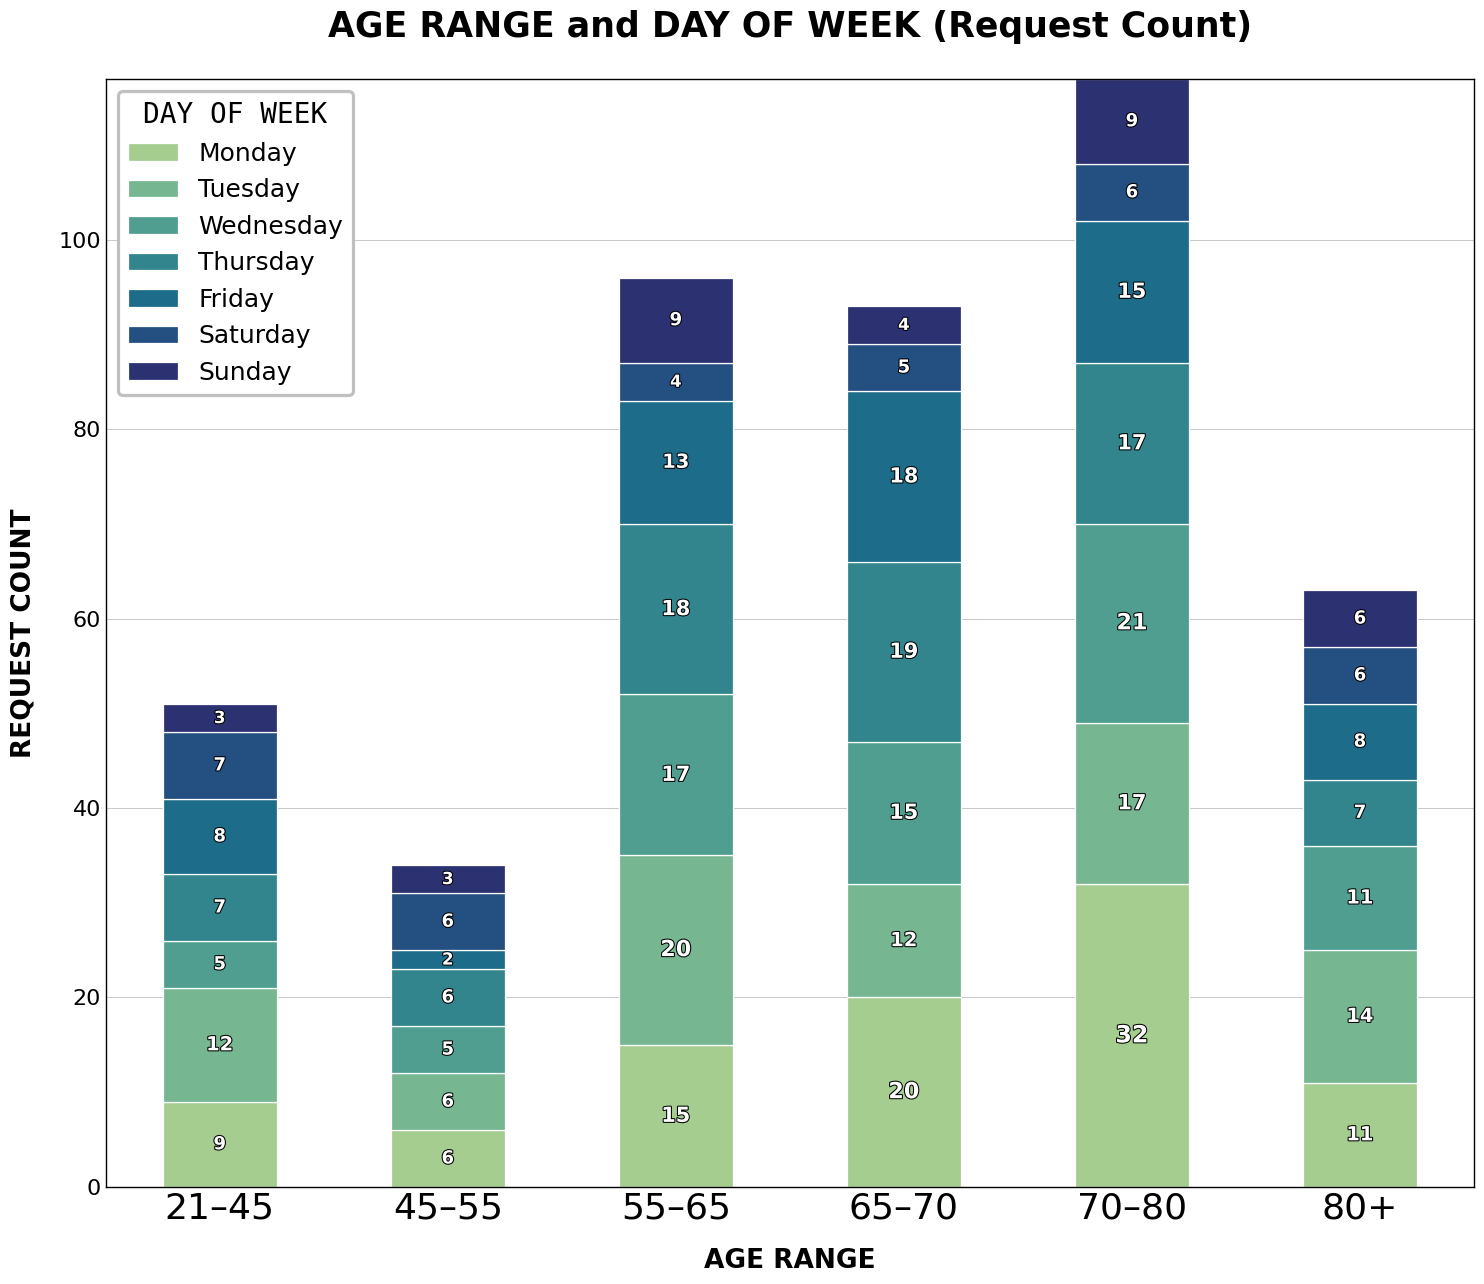

In [ ]:
# ===========================================
#     Request Count by AGE and DAY OF WEEK
# ===========================================

# Ensure DAY OF WEEK is ordered correctly
requests['DAY OF WEEK'] = pd.Categorical(
    requests['DAY OF WEEK'],
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
)

# === Crosstab for AGE RANGE and DAY OF WEEK ===
age_day_crosstab = pd.crosstab(
    requests['AGE RANGE'],       # x-axis
    requests['DAY OF WEEK']      # stacked bars
).sort_index()

# === Plot ===
fig, ax = plt.subplots(figsize=(15, 13))
bars = age_day_crosstab.plot(
    kind='bar',
    stacked=True,
    colormap='crest',
    ax=ax,
    edgecolor='white',
    linewidth=0.9
)

# === Titles and labels ===
ax.set_title(
    'AGE RANGE and DAY OF WEEK (Request Count)',
    fontweight='bold',
    fontsize=25,
    fontfamily='DejaVu Sans'
)
ax.set_xlabel(
    'AGE RANGE',
    fontweight='bold',
    fontfamily='DejaVu Sans',
    fontsize=19,
    labelpad=16
)
ax.set_ylabel(
    'REQUEST COUNT',
    fontweight='bold',
    fontfamily='DejaVu Sans',
    fontsize=19,
    labelpad=16
)

# === Add dynamic bar labels ===
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 1:
            min_font = 12
            max_font = 17
            fontsize = int(min(max_font, max(min_font, height * 0.20 + min_font)))
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(
                x, y, f'{int(height)}',
                ha='center', va='center',
                fontsize=fontsize,
                color='white',
                fontweight='bold',
                fontfamily='DejaVu Sans',
                path_effects=[
                    path_effects.Stroke(linewidth=1.5, foreground='black'),
                    path_effects.Normal()
                ]
            )

# === Grid and axis style ===
ax.yaxis.grid(True, linestyle='-', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

# Replace hyphen with en dash
ax.set_xticklabels([
    label.get_text().replace('-', '–') for label in ax.get_xticklabels()
])

for label in ax.get_xticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(26)
    label.set_ha('center')
    label.set_rotation(0)

for label in ax.get_yticklabels():
    label.set_fontfamily('DejaVu Sans')
    label.set_fontsize(16)
    #label.set_ha('left')
    label.set_rotation(0)

# === Legend ===
ax.legend(
    title='DAY OF WEEK',
    frameon=True,
    prop={'family': 'DejaVu Sans', 'size':18},
    title_fontsize=20,
    loc='upper left',
    framealpha=1, edgecolor='silver'
)

legend = ax.get_legend()
legend.get_frame().set_linewidth(2.3)

# === Final layout ===
plt.tight_layout()
plt.show()


# **GEOGRAPHIC ANALYSIS**


## **SETUP**

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from io import StringIO
import zipfile
from typing_extensions import dataclass_transform


!pip install contextily
import contextily as ctx

import numpy as np
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [ ]:
# import OCT-FEB contact requests
df = pd.read_excel("/content/Contact Requests (Oct-Mar).xlsx",
                   sheet_name="Contact Requests")
len(df)

454

In [ ]:
# keep only ZIP CODE col
zip_df = df[['ZIP CODE']].copy()

# --------------
# 1. DROP NULLS
# --------------
zip_df = zip_df.dropna(subset=['ZIP CODE'])

# convert to string
zip_df['ZIP CODE'] = zip_df['ZIP CODE'].astype(str)

# -------------------------------
# 2. REMOVE ROWS WITH < 5 DIGITS
# -------------------------------
zip_df = zip_df[zip_df['ZIP CODE'].str.count(r'\d') >= 5]

# ------------------------------------------------------------------------
# 3. EXTRACT FIRST 5 DIGITS ONLY (from zip codes longer than 5 characters)
# ------------------------------------------------------------------------
zip_df['ZIP CODE'] = zip_df['ZIP CODE'].str.extract(r'(\d{5})')

zip_df['ZIP CODE'] = zip_df['ZIP CODE'].astype(str)     # # Ensure zips are string

### SHOULD BE 333 OBS.
#zip_df

# ----------------------------------------------
# 4. KEEP ONLY TEXAS ZIP CODES (Starts with '7')
# ----------------------------------------------
zip_df = zip_df[zip_df['ZIP CODE'].str.startswith('7')].copy()

### SHOULD BE 293 OBSERVATIONS
zip_df

,ZIP CODE
0,76244
1,75002
2,77433
3,75228
4,75201
...,...
449,75013
450,75240
451,75232
452,75225


Load Shapefiles

In [ ]:
### === ZIP CODE SHAPEFILE ===
with zipfile.ZipFile("/content/tl_2024_us_zcta520.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/zcta_shapefile")

# load shapefile using GDF (geopandas)
shapefile_path = "/content/zcta_shapefile/tl_2024_us_zcta520.shp"
gdf = gpd.read_file(shapefile_path)


### === STATES SHAPEFILE ===
states = gpd.read_file("/content/tl_2024_us_state.zip")

# filter to just Texas (STATEFP 48 or STUSPS 'TX')
texas_state_outline = states[states['STUSPS'] == 'TX'].geometry.values[0]

In [ ]:
# keep only zips that fall within the Texas polygon
texas_shape = states[states['STUSPS'] == 'TX'].geometry.values[0]
texas_gdf = gdf[gdf.geometry.within(texas_shape)].copy()

In [ ]:
# TEXAS_GDF ZIP CODE RANGE
# -------------------------

# make sure zips are strings (preserve leading zeros)
texas_gdf['ZCTA5CE20'] = texas_gdf['ZCTA5CE20'].astype(str)

# convert to ints for numerical comparison
zip_codes_int = texas_gdf['ZCTA5CE20'].astype(int)

# min and max
lowest_zip = zip_codes_int.min()
highest_zip = zip_codes_int.max()

print(f"Lowest ZIP in Texas: {lowest_zip}")
print(f"Highest ZIP in Texas: {highest_zip}")


Lowest ZIP in Texas: 73960
Highest ZIP in Texas: 79938


(Contact Request zip_df) Min / Max / Distinct ZIP Codes

In [ ]:
# make sure zips are treated as strings (to preserve formatting), then sort numerically
zip_df['ZIP CODE'] = zip_df['ZIP CODE'].astype(str)

# min and max zip codes (as ints)
min_zip = zip_df['ZIP CODE'].astype(int).min()
max_zip = zip_df['ZIP CODE'].astype(int).max()

print(f"Lowest ZIP: {min_zip}")
print(f"Highest ZIP: {max_zip}")

# unique zips
zip_list = []
for zip in zip_df['ZIP CODE']:
    if zip not in zip_list:
        zip_list.append(zip)
print(f"# of Distinct ZIPs: {len(zip_list)}")

#distinct_values

Lowest ZIP: 75001
Highest ZIP: 79707
# of Distinct ZIPs: 120


## **TEXAS ZIP CODES**

### **STATE MAP**

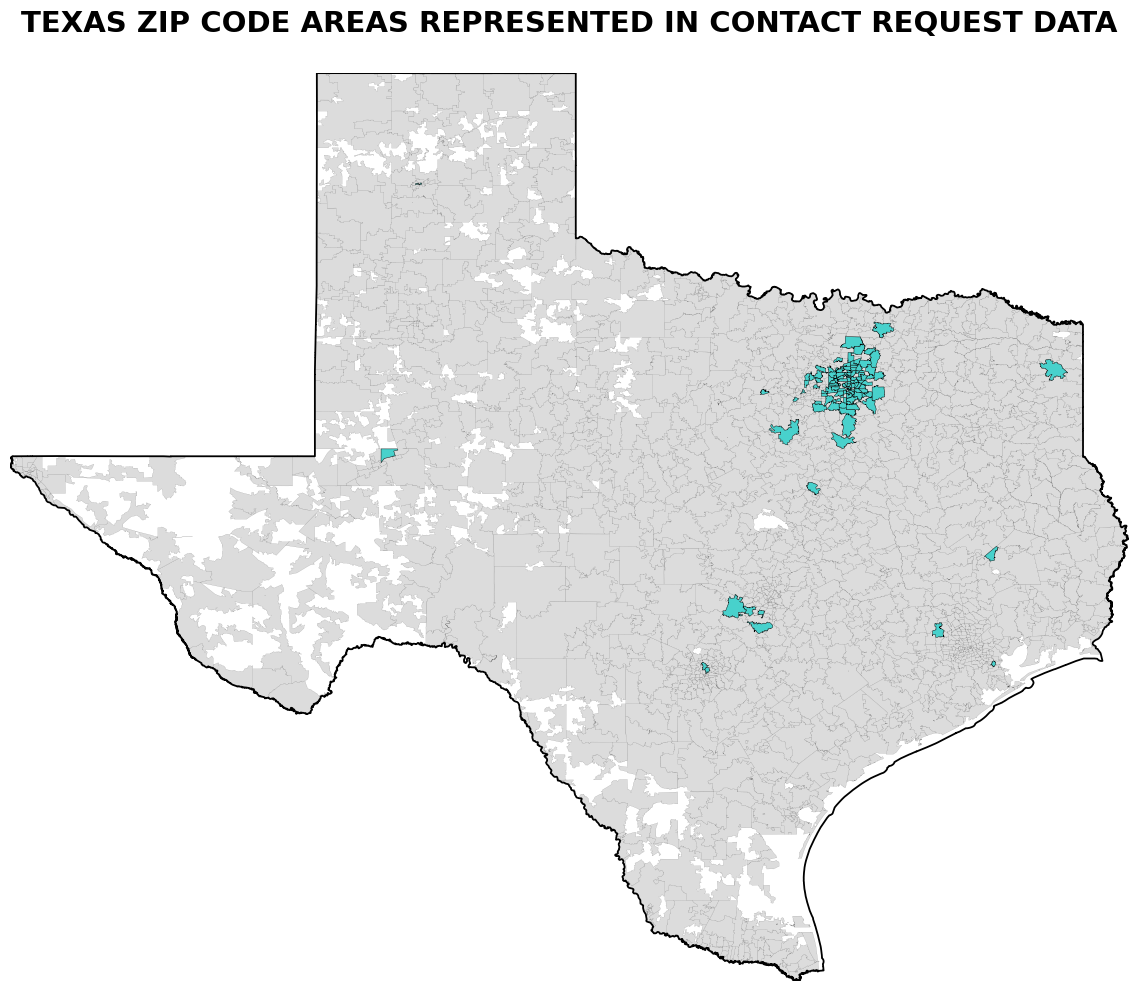

In [ ]:
# split TX zips into "highlight" and "background"
highlight_gdf = texas_gdf[texas_gdf['ZCTA5CE20'].isin(zip_list)].copy()
background_gdf = texas_gdf[~texas_gdf['ZCTA5CE20'].isin(zip_list)].copy()

# ------------------------
#           PLOT
# ------------------------
fig, ax = plt.subplots(figsize=(12, 10))

# plot all TX zips
background_gdf.plot(ax=ax, color='gainsboro', edgecolor='black', linewidth=0.05)

# color zips from contact request data
highlight_gdf.plot(ax=ax, color='mediumturquoise', edgecolor='black', linewidth=0.3)

# plot outline of texas border
gpd.GeoSeries([texas_state_outline]).boundary.plot(
    ax=ax,
    color='black',
    linewidth=1.3
)

# format
ax.set_title("TEXAS ZIP CODE AREAS REPRESENTED IN CONTACT REQUEST DATA", fontsize=21, fontweight='bold', fontfamily='DejaVu Sans')
ax.axis('off')
plt.tight_layout()
plt.show()

### **HEATMAP**

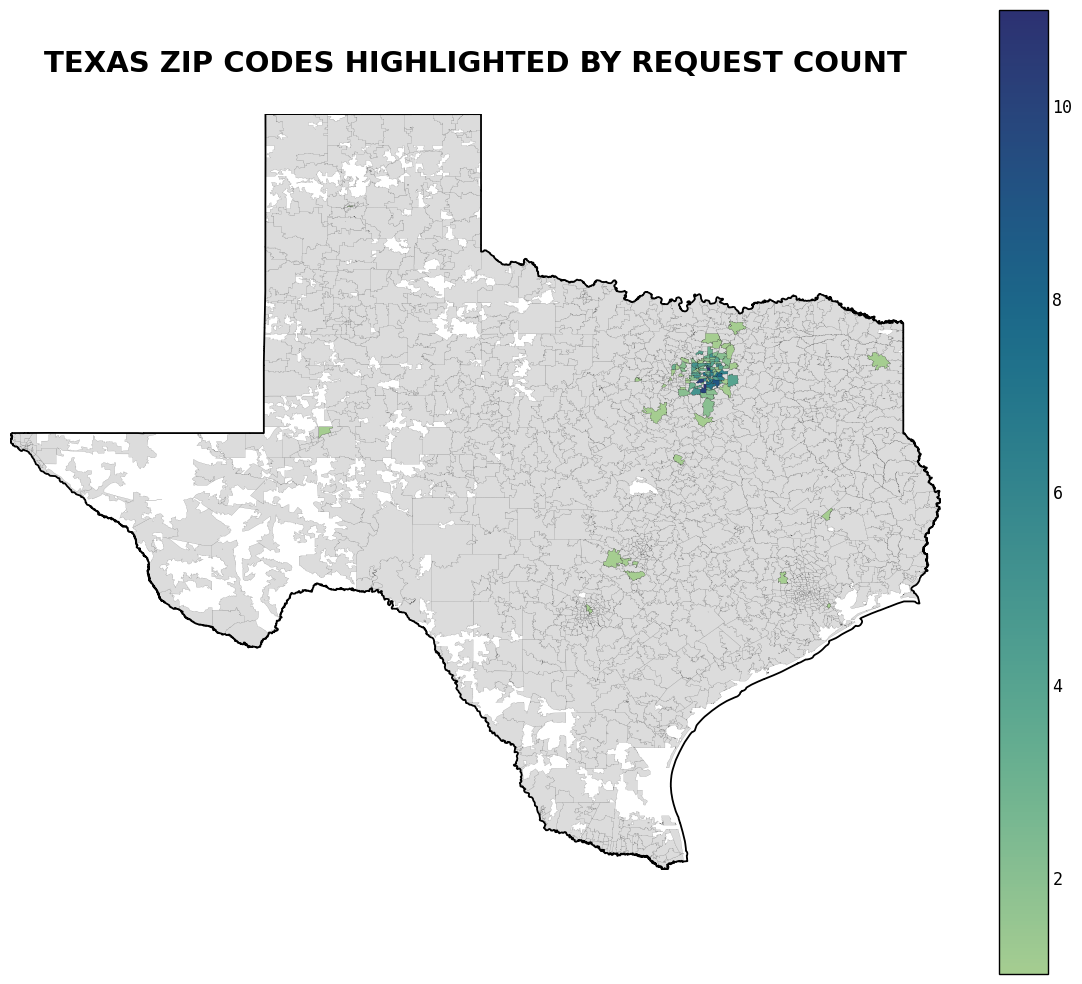

In [ ]:
# 2: get request counts for each zip
zip_df['ZIP CODE'] = zip_df['ZIP CODE'].astype(str)
zip_counts = zip_df['ZIP CODE'].value_counts().reset_index()
zip_counts.columns = ['ZIP', 'Request Count']

# 3: merge count data into the TX zips df
texas_gdf = texas_gdf.merge(zip_counts, how='left', left_on='ZCTA5CE20', right_on='ZIP')
texas_gdf['Request Count'] = texas_gdf['Request Count'].fillna(0)

# -----
# PLOT
# -----

# 4: Plot map of Texas ZIPs, highlighting only those with request counts
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all Texas ZIPs in light gray
texas_gdf.plot(ax=ax, color='gainsboro', edgecolor='black', linewidth=0.06)

# Highlight ZIPs from your data using heatmap
texas_gdf[texas_gdf['Request Count'] > 0].plot(
    ax=ax,
    column='Request Count',
    cmap=sns.color_palette("crest", as_cmap=True),
    linewidth=0.1,
    edgecolor='black',
    legend=True
)


# ADD OUTLINE OF TEXAS BORDER
# ----------------------------
# Plot the true Texas boundary outline on top
gpd.GeoSeries([texas_state_outline]).boundary.plot(
    ax=ax,
    color='black',
    linewidth=1.3
)


# Format
ax.set_title("TEXAS ZIP CODES HIGHLIGHTED BY REQUEST COUNT", fontsize=21, fontweight='bold', fontfamily='DejaVu Sans')
ax.axis('off')
plt.tight_layout()
plt.show()


## **DALLAS AREA ZIP CODES Heatmap**

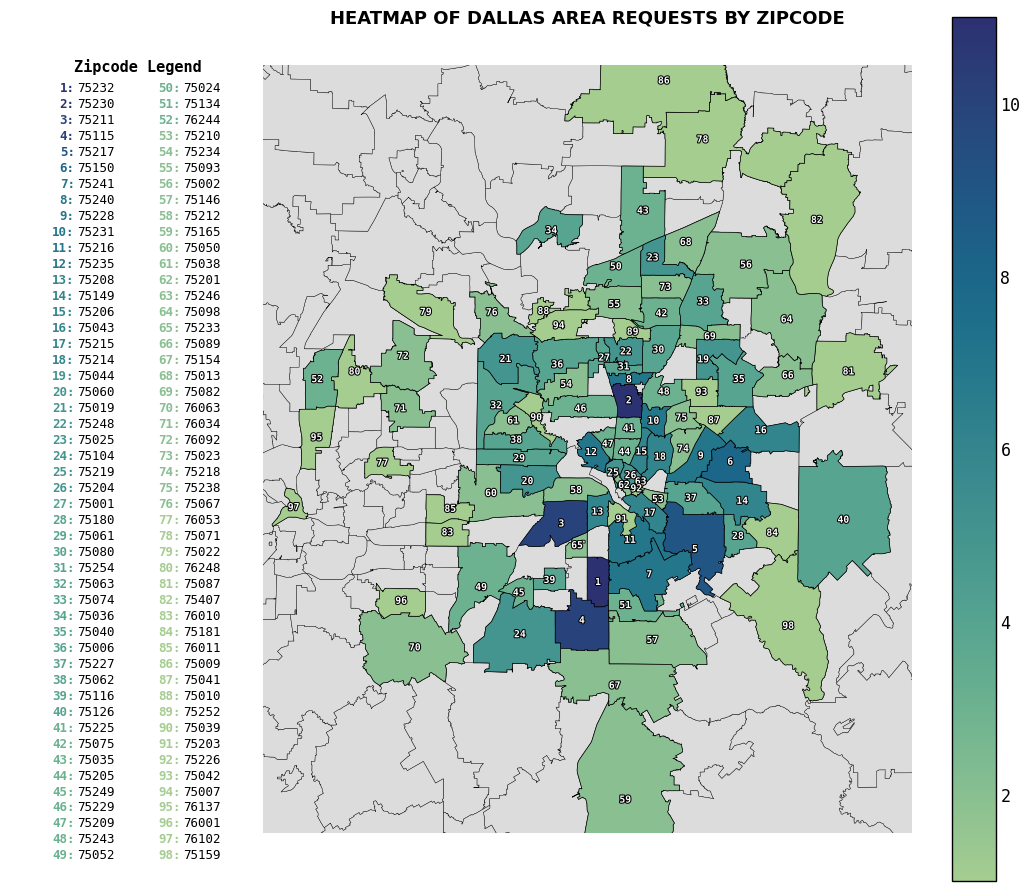

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

# STEP 1: Prepare ZIP data
zip_df['ZIP CODE'] = zip_df['ZIP CODE'].astype(str)

# STEP 2: Prepare TIGER shapefile
gdf['ZCTA5CE20'] = gdf['ZCTA5CE20'].astype(str)

# STEP 3: Filter shapefile to Texas ZIPs only
texas_gdf = gdf[gdf['ZCTA5CE20'].str.startswith(('75', '76', '77', '78', '79'))].copy()

# STEP 4: Count ZIPs from your data
zip_counts = zip_df['ZIP CODE'].value_counts().reset_index()
zip_counts.columns = ['ZIP', 'Request Count']

# STEP 5: Merge request counts into ZIP shapefile
texas_gdf = texas_gdf.merge(zip_counts, how='left', left_on='ZCTA5CE20', right_on='ZIP')
texas_gdf['Request Count'] = texas_gdf['Request Count'].fillna(0)

# STEP 6: Get ZIPs that have request data
highlighted = texas_gdf[texas_gdf['Request Count'] > 0].copy()

# STEP 7: Define zoom boundary using key ZIPs
zoom_zips = ['76259', '75442', '76036', '75158']
zoom_area = texas_gdf[texas_gdf['ZCTA5CE20'].isin(zoom_zips)]
minx, miny, maxx, maxy = zoom_area.total_bounds

# STEP 8: Expand box into square
buffer_factor = 0.8
center_x = (minx + maxx) / 2
center_y = (miny + maxy) / 2
width = (maxx - minx) * buffer_factor
height = (maxy - miny) * buffer_factor
square_size = max(width, height)
minx = center_x - square_size / 2
maxx = center_x + square_size / 2
miny = center_y - square_size / 2
maxy = center_y + square_size / 2

# STEP 9: Create the plot with white space on the left
fig = plt.figure(figsize=(11, 9), facecolor='white')
gs = fig.add_gridspec(1, 2, width_ratios=[0.9, 3.1])

# Left: empty white space (for legend or padding)
ax_blank = fig.add_subplot(gs[0])
ax_blank.axis('off')

# Right: actual map with labels
ax = fig.add_subplot(gs[1])

# Plot background
texas_gdf.plot(ax=ax, color='gainsboro', edgecolor='black', linewidth=0.3)

# Plot highlighted ZIPs
highlighted.plot(
    ax=ax,
    column='Request Count',
    cmap=sns.color_palette("crest", as_cmap=True),
    linewidth=0.5,
    edgecolor='black',
    legend=True
)

# STEP 10: Filter to visible ZIPs and rank
visible_highlighted = highlighted.cx[minx:maxx, miny:maxy].copy()
visible_highlighted = visible_highlighted.sort_values(by='Request Count', ascending=False).reset_index(drop=True)
visible_highlighted['Rank'] = range(1, len(visible_highlighted) + 1)

# STEP 11: Use representative points for smart label placement
visible_highlighted['label_point'] = visible_highlighted.representative_point()

# STEP 12: Annotate visible ZIPs with white text + black outline
for _, row in visible_highlighted.iterrows():
    txt = ax.text(
        row['label_point'].x,
        row['label_point'].y,
        str(row['Rank']),
        ha='center',
        va='center',
        fontsize=7,
        color='white',
        weight='bold',
        zorder=10,
    )
    txt.set_path_effects([
        path_effects.Stroke(linewidth=1.5, foreground='black'),
        path_effects.Normal()
    ])

# STEP 13: Apply zoom
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)



# STEP 14: Add ZIP rank legend title aligned with map title
fig.text(
    0.075, 0.925,  # adjust x to center the title above your two legend columns
    "Zipcode Legend",
    fontsize=11,
    fontweight='bold',
    ha='left',
    va='center'
)

# STEP 15: Build and render the ZIP label list under the title in two columns

# Create list like "1: 75230"
legend_entries = []
for _, row in visible_highlighted.sort_values("Rank").iterrows():
    label = int(row["Rank"])
    zip_code = row["ZCTA5CE20"]
    legend_entries.append(f"{label}: {zip_code}")

# Split into two columns
half = (len(legend_entries) + 1) // 2
col1 = legend_entries[:half]
col2 = legend_entries[half:]

# Pad shorter column
while len(col2) < len(col1):
    col2.append("")

# Build two-column rows
legend_lines = []
for i in range(len(col1)):
    left = col1[i].ljust(12)
    right = col2[i]
    legend_lines.append(left + right)

# Final combined legend block
legend_text = "\n".join(legend_lines)

# POSITIONING OF TWO COLUMNS
#ax_blank.text(
#    0.25, 0.945,  # position just below the title
#    legend_text,
#    fontsize=9,
#    ha='left',
#    va='top',
#    #family='monospace',
#    transform=ax_blank.transAxes
#)



# STEP 16: Color ZIP label numbers by heatmap color scale

import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Set up same colormap and normalization used in the heatmap
cmap = sns.color_palette("crest", as_cmap=True)
norm = mcolors.Normalize(
    vmin=visible_highlighted['Request Count'].min(),
    vmax=visible_highlighted['Request Count'].max()
)

# Build lookup dict: Rank -> (ZIP, Count, Color)
legend_info = {}
for _, row in visible_highlighted.iterrows():
    rank = int(row["Rank"])
    zip_code = row["ZCTA5CE20"]
    count = row["Request Count"]
    color = cmap(norm(count))
    legend_info[rank] = (zip_code, color)

# Row spacing
line_height = 0.0185
start_y = 0.925
x_col1 = 0.275
x_col2 = 0.725

# Draw column 1
for i, entry in enumerate(col1):
    if entry == "":
        continue
    rank_str, zip_code = entry.split(": ")
    rank = int(rank_str)
    color = legend_info[rank][1]
    y = start_y - i * line_height
    ax_blank.text(x_col1, y, f"{rank}:", fontsize=9, fontweight='bold',
                  ha='right', va='top', transform=ax_blank.transAxes, color=color)
    ax_blank.text(x_col1 + 0.01, y, zip_code, fontsize=9,
                  ha='left', va='top', transform=ax_blank.transAxes)

# Draw column 2
for i, entry in enumerate(col2):
    if entry == "":
        continue
    rank_str, zip_code = entry.split(": ")
    rank = int(rank_str)
    color = legend_info[rank][1]
    y = start_y - i * line_height
    ax_blank.text(x_col2, y, f"{rank}:", fontsize=9, fontweight='bold',
                  ha='right', va='top', transform=ax_blank.transAxes, color=color)
    ax_blank.text(x_col2 + 0.01, y, zip_code, fontsize=9,
                  ha='left', va='top', transform=ax_blank.transAxes)



# Final formatting
ax.set_title("HEATMAP OF DALLAS AREA REQUESTS BY ZIPCODE", fontsize=13, fontweight='black', fontfamily='DejaVu Sans')
ax.axis('off')
plt.tight_layout()
plt.show()
